<a href="https://colab.research.google.com/github/guinb/atlantico_avanti_bootcamp/blob/main/Projeto_Breast_Ultrasound_Avanti_bootcamp_(modelo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Carregando os dados

##Baixando o dataset

In [1]:
!git clone https://github.com/guinb/dataset_projeto

Cloning into 'dataset_projeto'...
remote: Enumerating objects: 1588, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1588 (delta 0), reused 3 (delta 0), pack-reused 1581
Receiving objects: 100% (1588/1588), 194.65 MiB | 36.23 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Updating files: 100% (1579/1579), done.


## Carregando os dados

In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2

In [3]:
def mescla_mascaras(mascara1, mascara2):
  '''
  Mescla máscaras de imagens com mais de 1 máscara e sobrescreve máscara original
  Parâmetro:
  mascara1 (str) : Caminho para máscara original
  mascara2 (str) : Caminho para segunda máscara
  '''
  masc1 = cv2.imread(mascara1)
  masc2 = cv2.imread(mascara2)
  altura, largura, _ = masc1.shape
  imagem = np.zeros((1,altura,largura,3))
  imagem = imagem + masc1 + masc2
  return imagem[0,:,:,0]

def monta_dataframe(pasta):
  '''
  Retorna um DataFrame com as informações do dataset
  Parâmetro:
  pasta (str) : Informe o caminho até a pasta 'Dataset_BUSI_with_GT'
  '''
  fotos = sorted(glob(f"{pasta}*/*).png"))
  lista_total = []
  for caminho in fotos:
    mascaras = sorted(glob(caminho[:-4] + '*_mask*'))
    caminho_separado = caminho.split('/')
    cont=0
    for caminho_masc in mascaras:
      cont+=cont+1
      if cont < 2:
        lista_indiv = [caminho_separado[5]]
        lista_indiv.append(caminho_separado[4])
        lista_indiv.append(caminho)
        lista_indiv.append(caminho_masc)
        lista_total.append(lista_indiv)
      else:
        mascara_mesclada = mescla_mascaras(lista_total[-1][-1], caminho_masc)
        cv2.imwrite(lista_total[-1][-1], mascara_mesclada)
  return pd.DataFrame(lista_total, columns=['Nome','Categoria','Original','Ground Truth'])

In [4]:
dataframe = monta_dataframe('/content/dataset_projeto/Dataset_BUSI_with_GT/')
dataframe

Nome Categoria  \
0      benign (1).png    benign   
1     benign (10).png    benign   
2    benign (100).png    benign   
3    benign (101).png    benign   
4    benign (102).png    benign   
..                ...       ...   
775   normal (95).png    normal   
776   normal (96).png    normal   
777   normal (97).png    normal   
778   normal (98).png    normal   
779   normal (99).png    normal   

                                              Original  \
0    /content/dataset_projeto/Dataset_BUSI_with_GT/...   
1    /content/dataset_projeto/Dataset_BUSI_with_GT/...   
2    /content/dataset_projeto/Dataset_BUSI_with_GT/...   
3    /content/dataset_projeto/Dataset_BUSI_with_GT/...   
4    /content/dataset_projeto/Dataset_BUSI_with_GT/...   
..                                                 ...   
775  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
776  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
777  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
778  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
779  /content/dataset_projeto/Dataset_BUSI_with_GT/...   

                                          Ground Truth  
0    /content/dataset_projeto/Dataset_BUSI_with_GT/...  
1    /content/dataset_projeto/Dataset_BUSI_with_GT/...  
2    /content/dataset_projeto/Dataset_BUSI_with_GT/...  
3    /content/dataset_projeto/Dataset_BUSI_with_GT/...  
4    /content/dataset_projeto/Dataset_BUSI_with_GT/...  
..                                                 ...  
775  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
776  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
777  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
778  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
779  /content/dataset_projeto/Dataset_BUSI_with_GT/...  

[780 rows x 4 columns]

In [5]:
dataframe['Nome'][400]

'benign (66).png'

<Figure size 640x480 with 0 Axes>

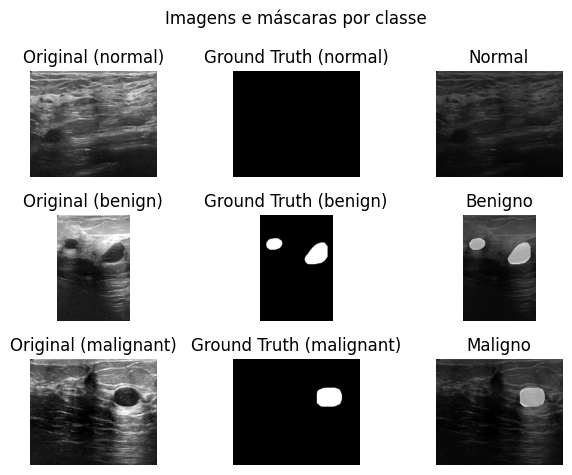

In [6]:
plt.figure()
f, ax = plt.subplots(3,3)

imagem99 = cv2.imread(dataframe['Original'][779])
mascara99 = cv2.imread(dataframe['Ground Truth'][779])

imagem100 = cv2.imread(dataframe['Original'][2])
mascara100 = cv2.imread(dataframe['Ground Truth'][2])

imagem66 = cv2.imread(dataframe['Original'][400])
mascara66 = cv2.imread(dataframe['Ground Truth'][400])

ax[0,0].imshow(imagem99, cmap='gray')
ax[0,0].set_title('Original (normal)')
ax[0,0].axis('off')
ax[0,1].imshow(mascara99, cmap='jet')
ax[0,1].set_title('Ground Truth (normal)')
ax[0,1].axis('off')
ax[0,2].imshow(imagem99, cmap='jet')
ax[0,2].imshow(mascara99, alpha=0.6)
ax[0,2].set_title('Normal')
ax[0,2].axis('off')

ax[1,0].imshow(imagem100, cmap='gray')
ax[1,0].set_title('Original (benign)')
ax[1,0].axis('off')
ax[1,1].imshow(mascara100, cmap='jet')
ax[1,1].set_title('Ground Truth (benign)')
ax[1,1].axis('off')
ax[1,2].imshow(imagem100, cmap='jet')
ax[1,2].imshow(mascara100, alpha=0.6)
ax[1,2].set_title('Benigno')
ax[1,2].axis('off')

ax[2,0].imshow(imagem66, cmap='gray')
ax[2,0].set_title('Original (malignant)')
ax[2,0].axis('off')
ax[2,1].imshow(mascara66, cmap='jet')
ax[2,1].set_title('Ground Truth (malignant)')
ax[2,1].axis('off')
ax[2,2].imshow(imagem66, cmap='jet')
ax[2,2].imshow(mascara66, alpha=0.6)
ax[2,2].set_title('Maligno')
ax[2,2].axis('off')

plt.suptitle("Imagens e máscaras por classe")
plt.tight_layout()
plt.show()

#Análise Exploratória

##Distribuição das categorias

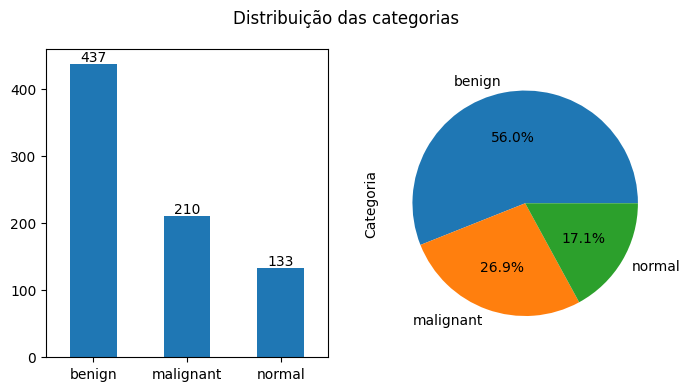

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

dataframe['Categoria'].value_counts().plot(kind='bar', ax = axs[0], rot=0).bar_label(axs[0].containers[0])
dataframe['Categoria'].value_counts().plot(kind='pie', ax = axs[1], autopct='%1.1f%%')

fig.suptitle('Distribuição das categorias')
plt.show()

Dataset é desbalanceado.

##Imagens repetidas

Comparação entre as imagens do dataset.

*Será que existem imagens repetidas?*

In [8]:
# n = 0
# for original in dataframe['Original'].unique()[:390]:
#   a = cv2.imread(original) # Lendo imagem 1ª metade do dataset
#   for duplicada in dataframe['Original'].unique()[n:]:
#     b = cv2.imread(duplicada) # Lendo as outras imagens para comparaçãp
#     if a.shape == b.shape: # se o tamanho + canais forem iguais nas 2 imagens
#       difference = cv2.subtract(a, b) # pegamos apenas as diferenças entre as 2 imagens
#       b, g, r = cv2.split(difference) # separamos os canais R G B dessa diferença entre imagens
#       if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0: # se não houver diferença entre nenhum canal
#         if original != duplicada: # se os arquivos forem diferentes
#           print(f"Imagem: {original} - é igual: {duplicada}") # as imagens são iguais
#   n+=1

Encontramos uma repetição.

benign/**benign (433).png** é exatamente igual a malignant/malignant (145).png

<Figure size 640x480 with 0 Axes>

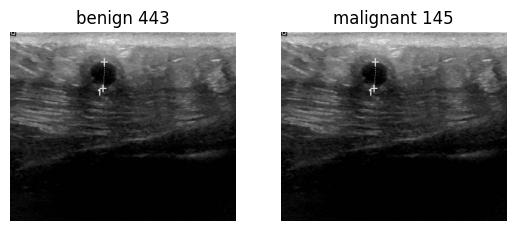

In [9]:
plt.figure()

f, ax = plt.subplots(1,2)

ax[0].imshow(plt.imread('/content/dataset_projeto/Dataset_BUSI_with_GT/benign/benign (433).png'))
ax[0].set_title('benign 443')
ax[0].axis('off')
ax[1].imshow(plt.imread('/content/dataset_projeto/Dataset_BUSI_with_GT/malignant/malignant (145).png'))
ax[1].set_title('malignant 145')
ax[1].axis('off')
plt.show()

##Propriedades das imagens

In [10]:
lista = []
for foto in dataframe['Original']:
  image = cv2.imread(foto)
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  altura, largura = image_gray.shape
  row = {'Imagem':str(foto.split('/')[5])[:-4],'Altura':altura,'Largura':largura,
         'Proporção':float(altura)/largura,'Tipo':image_gray.dtype,
         'Máximo':image_gray.max(),'Mínimo':image_gray.min(),
         'Média':image_gray.mean(),'Desvio padrão':image_gray.std()}
  lista.append(row)

df_propriedades_img = pd.DataFrame(lista)
df_propriedades_img

Imagem  Altura  Largura  Proporção   Tipo  Máximo  Mínimo  \
0      benign (1)     471      562   0.838078  uint8     255       0   
1     benign (10)     585      683   0.856515  uint8     255       0   
2    benign (100)     473      323   1.464396  uint8     255       0   
3    benign (101)     473      563   0.840142  uint8     255       0   
4    benign (102)     610      634   0.962145  uint8     239       0   
..            ...     ...      ...        ...    ...     ...     ...   
775   normal (95)     582      693   0.839827  uint8     255       0   
776   normal (96)     578      687   0.841339  uint8     255       0   
777   normal (97)     470      560   0.839286  uint8     255       0   
778   normal (98)     470      562   0.836299  uint8     255       0   
779   normal (99)     468      556   0.841727  uint8     255       0   

          Média  Desvio padrão  
0    132.375146      58.393189  
1    103.240733      58.324293  
2     90.107849      67.727781  
3    103.225690      57.230160  
4     54.390260      37.923081  
..          ...            ...  
775  126.982005      46.895217  
776  105.731101      50.655034  
777   77.779833      51.472080  
778   77.354823      51.300771  
779   85.663085      48.218892  

[780 rows x 9 columns]

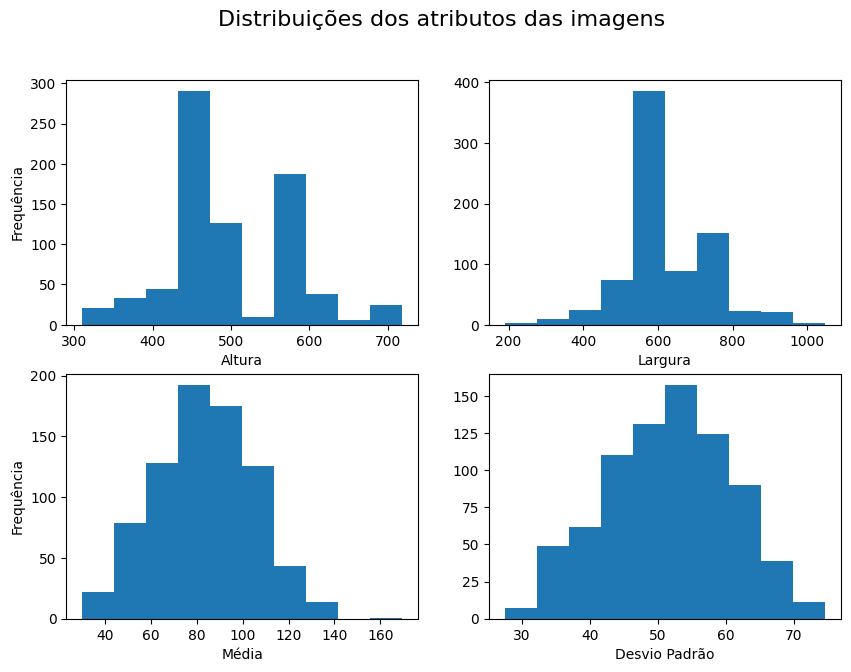

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10,7))

df_propriedades_img['Altura'].plot(kind='hist', ax = axs[0,0]).set(ylabel='Frequência', xlabel='Altura')
df_propriedades_img['Largura'].plot(kind='hist', ax = axs[0,1]).set(ylabel=None, xlabel='Largura')
df_propriedades_img['Média'].plot(kind='hist', ax = axs[1,0]).set(ylabel='Frequência', xlabel='Média')
df_propriedades_img['Desvio padrão'].plot(kind='hist', ax = axs[1,1]).set(ylabel=None, xlabel='Desvio Padrão')

fig.suptitle('Distribuições dos atributos das imagens', fontsize=16)
plt.show()

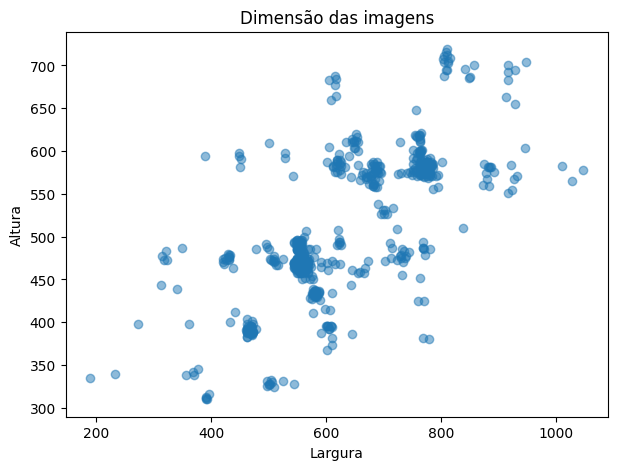

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(df_propriedades_img.Largura, df_propriedades_img.Altura,alpha=0.5)

plt.title('Dimensão das imagens')
plt.xlabel('Largura')
plt.ylabel('Altura')
plt.show()

In [13]:
df_propriedades_img.describe()

Altura      Largura   Proporção      Máximo      Mínimo  \
count  780.000000   780.000000  780.000000  780.000000  780.000000   
mean   501.452564   615.679487    0.829600  251.987179    0.216667   
std     76.687948   122.055701    0.127168    7.786123    1.671471   
min    310.000000   190.000000    0.487179  207.000000    0.000000   
25%    465.000000   554.000000    0.759506  255.000000    0.000000   
50%    474.000000   564.000000    0.834532  255.000000    0.000000   
75%    574.000000   713.500000    0.853345  255.000000    0.000000   
max    719.000000  1048.000000    1.763158  255.000000   22.000000   

            Média  Desvio padrão  
count  780.000000     780.000000  
mean    83.626646      51.527021  
std     21.349652       9.163082  
min     29.914556      27.530374  
25%     68.084032      45.129618  
50%     83.468179      51.994424  
75%     98.433145      58.048200  
max    169.633139      74.651755

Com uma média de aproximadamente 615px de largura por 500px de altura, as imagens não seguem um padrão de tamanho e nem de proporção.

#Pré processamento

##Redimensionamento das imagens

Apesar da possível perda de informação, decidimos que o melhor caminho seria padronizar as dimensões das imagens com os objetivos de:
*   Facilitar o processamento
*   Utilização de memória mais eficiente
*   Reduzir a complexidade

In [14]:
import numpy as np
import random

In [15]:
def redimensionar(img, tamanho = 128):
  return cv2.resize(img, (tamanho, tamanho), interpolation = cv2.INTER_AREA)

<Figure size 640x480 with 0 Axes>

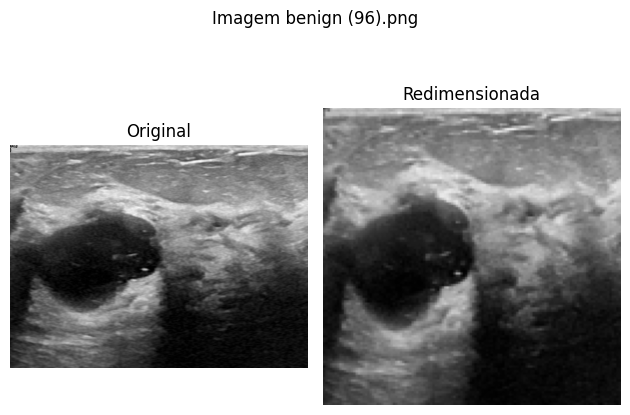

In [16]:
plt.figure()

f, ax = plt.subplots(1,2)
img406 = cv2.imread(dataframe['Original'][433])

ax[0].imshow(img406)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(redimensionar(img406))
ax[1].set_title('Redimensionada')
ax[1].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][433]}")
plt.tight_layout()
plt.show()

##Equalização do histograma

Decidimos pela equalização do histograma com o objetivo de obter uma melhora no contraste da imagem, destacando as estruturas de interesse (nódulos).

<Figure size 640x480 with 0 Axes>

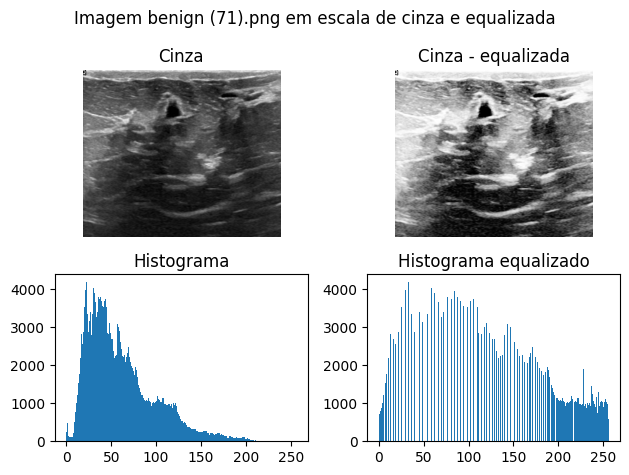

In [17]:
def equalizar_hist(imagem):
  return cv2.equalizeHist(imagem)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_equalizada = equalizar_hist(imagem_cinza)

plt.figure()
f, ax = plt.subplots(2,2)

ax[0,0].imshow(imagem_cinza, cmap='gray')
ax[0,0].set_title('Cinza')
ax[0,0].axis('off')
ax[0,1].imshow(imagem_cinza_equalizada, cmap='gray')
ax[0,1].set_title('Cinza - equalizada')
ax[0,1].axis('off')

ax[1,0].hist(imagem_cinza.ravel(),256,[0,256])
ax[1,0].set_title('Histograma')
ax[1,1].hist(imagem_cinza_equalizada.ravel(),256,[0,256])
ax[1,1].set_title('Histograma equalizado')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} em escala de cinza e equalizada")
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

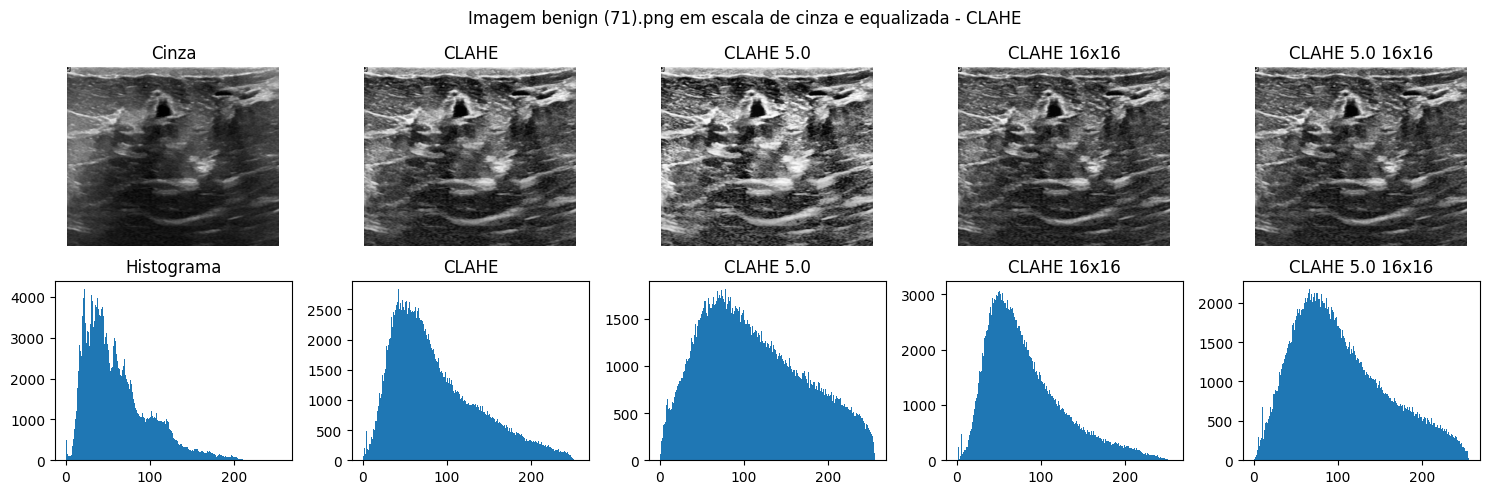

In [18]:
def equalizar_hist_clahe(imagem, clipLimit = 2.0, tileGridSize = (8, 8)):
  clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
  return clahe.apply(imagem)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_equalizada = equalizar_hist_clahe(imagem_cinza)
imagem_cinza_equalizada2 = equalizar_hist_clahe(imagem_cinza, 5.0)
imagem_cinza_equalizada3 = equalizar_hist_clahe(imagem_cinza, 2.0, (16, 16))
imagem_cinza_equalizada4 = equalizar_hist_clahe(imagem_cinza, 5.0, (16, 16))

plt.figure(figsize=(15,5))
f, ax = plt.subplots(2,5)
plt.gcf().set_size_inches(15, 5)

ax[0,0].imshow(imagem_cinza, cmap='gray')
ax[0,0].set_title('Cinza')
ax[0,0].axis('off')
ax[0,1].imshow(imagem_cinza_equalizada, cmap='gray')
ax[0,1].set_title('CLAHE')
ax[0,1].axis('off')
ax[0,2].imshow(imagem_cinza_equalizada2, cmap='gray')
ax[0,2].set_title('CLAHE 5.0')
ax[0,2].axis('off')
ax[0,3].imshow(imagem_cinza_equalizada3, cmap='gray')
ax[0,3].set_title('CLAHE 16x16')
ax[0,3].axis('off')
ax[0,4].imshow(imagem_cinza_equalizada3, cmap='gray')
ax[0,4].set_title('CLAHE 5.0 16x16')
ax[0,4].axis('off')

ax[1,0].hist(imagem_cinza.ravel(),256,[0,256])
ax[1,0].set_title('Histograma')
ax[1,1].hist(imagem_cinza_equalizada.ravel(),256,[0,256])
ax[1,1].set_title('CLAHE')
ax[1,2].hist(imagem_cinza_equalizada2.ravel(),256,[0,256])
ax[1,2].set_title('CLAHE 5.0')
ax[1,3].hist(imagem_cinza_equalizada3.ravel(),256,[0,256])
ax[1,3].set_title('CLAHE 16x16')
ax[1,4].hist(imagem_cinza_equalizada4.ravel(),256,[0,256])
ax[1,4].set_title('CLAHE 5.0 16x16')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} em escala de cinza e equalizada - CLAHE")
plt.tight_layout()
plt.show()

##Filtros, suavização e realces

###Filtro de Mediana

<Figure size 1000x300 with 0 Axes>

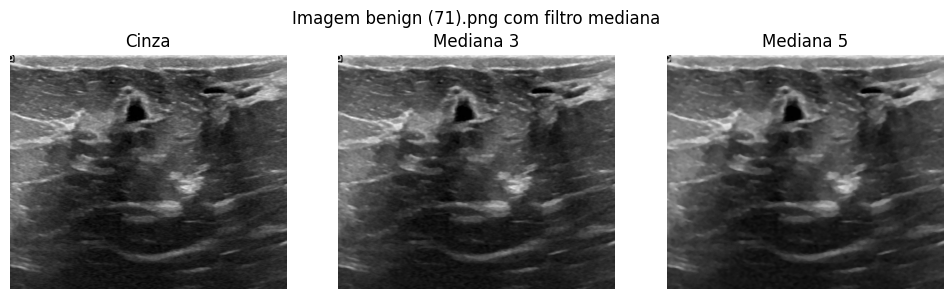

In [19]:
def filtro_mediana(imagem, blur=3):
  return cv2.medianBlur(imagem, blur)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_filtrada = filtro_mediana(imagem_cinza)
imagem_cinza_filtrada2 = filtro_mediana(imagem_cinza, 5)

plt.figure(figsize=(10,3))
f, ax = plt.subplots(1,3)
plt.gcf().set_size_inches(10, 3)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_filtrada, cmap='gray')
ax[1].set_title('Mediana 3')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_filtrada2, cmap='gray')
ax[2].set_title('Mediana 5')
ax[2].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com filtro mediana")
plt.tight_layout()
plt.show()

###Filtro Gaussiano

<Figure size 1300x300 with 0 Axes>

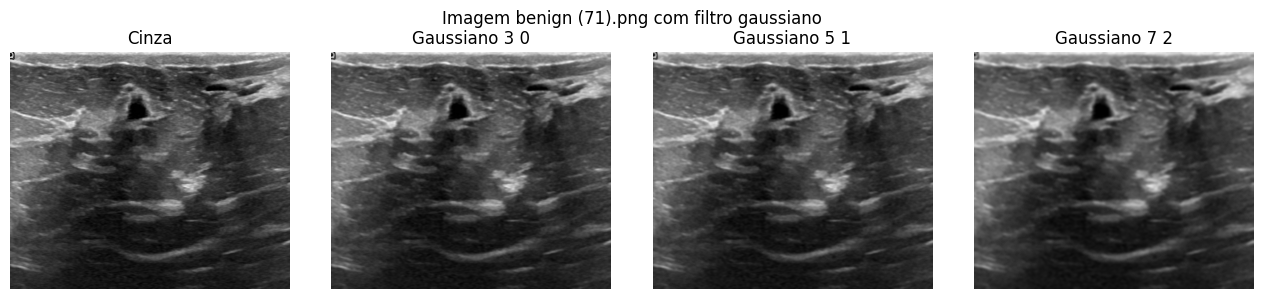

In [20]:
def filtro_gaussiano(imagem, k=(3,3), x=0):
  return cv2.GaussianBlur(imagem, ksize = k, sigmaX = x)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_filtrada = filtro_gaussiano(imagem_cinza)
imagem_cinza_filtrada2 = filtro_gaussiano(imagem_cinza, (5,5), 1)
imagem_cinza_filtrada3 = filtro_gaussiano(imagem_cinza, (7,7), 2)

plt.figure(figsize=(13,3))
f, ax = plt.subplots(1,4)
plt.gcf().set_size_inches(13, 3)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_filtrada, cmap='gray')
ax[1].set_title('Gaussiano 3 0')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_filtrada2, cmap='gray')
ax[2].set_title('Gaussiano 5 1')
ax[2].axis('off')
ax[3].imshow(imagem_cinza_filtrada3, cmap='gray')
ax[3].set_title('Gaussiano 7 2')
ax[3].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com filtro gaussiano")
plt.tight_layout()
plt.show()

###Filtro Bilateral

<Figure size 1300x300 with 0 Axes>

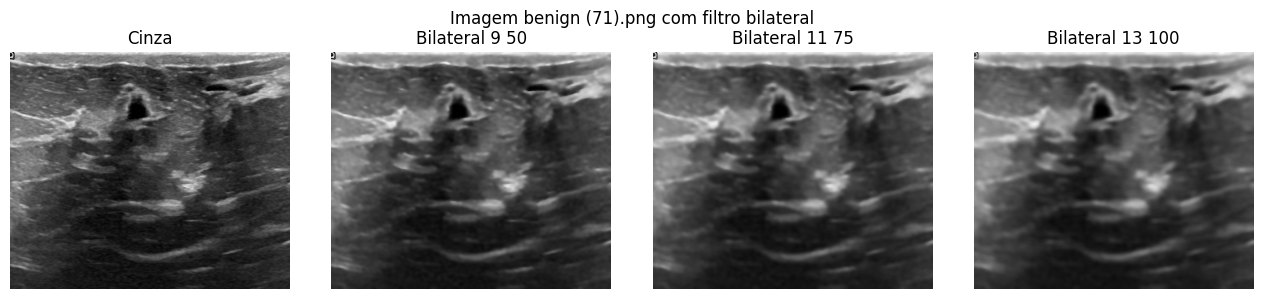

In [21]:
def filtro_bilateral(imagem, diametro_px=9, sigmaColor=50, sigmaSpace=50):
  return cv2.bilateralFilter(imagem, d = diametro_px, sigmaColor = sigmaColor, sigmaSpace = sigmaSpace)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_filtrada = filtro_bilateral(imagem_cinza)
imagem_cinza_filtrada2 = filtro_bilateral(imagem_cinza,11,75,75)
imagem_cinza_filtrada3 = filtro_bilateral(imagem_cinza,13,100,100)

plt.figure(figsize=(13,3))
f, ax = plt.subplots(1,4)
plt.gcf().set_size_inches(13, 3)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_filtrada, cmap='gray')
ax[1].set_title('Bilateral 9 50')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_filtrada2, cmap='gray')
ax[2].set_title('Bilateral 11 75')
ax[2].axis('off')
ax[3].imshow(imagem_cinza_filtrada3, cmap='gray')
ax[3].set_title('Bilateral 13 100')
ax[3].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com filtro bilateral")
plt.tight_layout()
plt.show()

###Filtro Anisotrópico

<Figure size 1300x300 with 0 Axes>

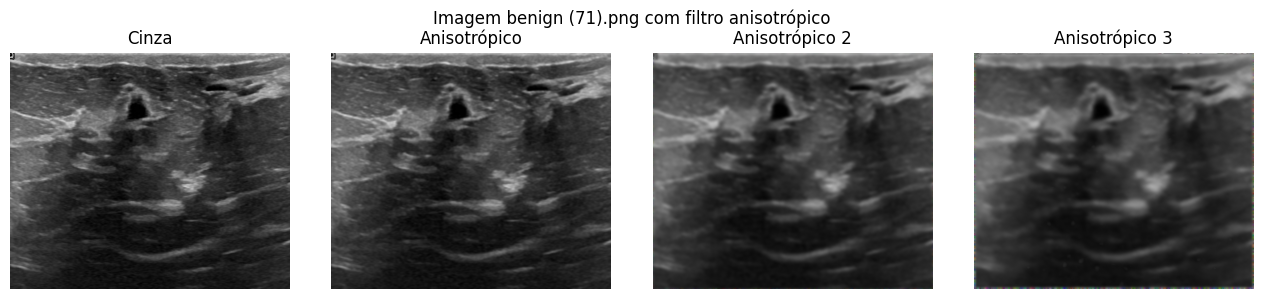

In [22]:
import cv2.ximgproc

def filtro_anisotropico(imagem, alpha=0.1, kappa=10, n=1):
  return cv2.ximgproc.anisotropicDiffusion(imagem.astype(np.uint8), alpha=alpha, K=kappa, niters=n)

imagem_cinza = cv2.imread(dataframe['Original'][406])
imagem_cinza_filtrada = filtro_anisotropico(imagem_cinza)
imagem_cinza_filtrada2 = filtro_anisotropico(imagem_cinza, 0.2, 20, 5)
imagem_cinza_filtrada3 = filtro_anisotropico(imagem_cinza, 0.2, 20, 10)

plt.figure(figsize=(13,3))
f, ax = plt.subplots(1,4)
plt.gcf().set_size_inches(13, 3)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_filtrada, cmap='gray')
ax[1].set_title('Anisotrópico')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_filtrada2, cmap='gray')
ax[2].set_title('Anisotrópico 2')
ax[2].axis('off')
ax[3].imshow(imagem_cinza_filtrada3, cmap='gray')
ax[3].set_title('Anisotrópico 3')
ax[3].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com filtro anisotrópico")
plt.tight_layout()
plt.show()

###Limiarização Adaptativa

<Figure size 1300x300 with 0 Axes>

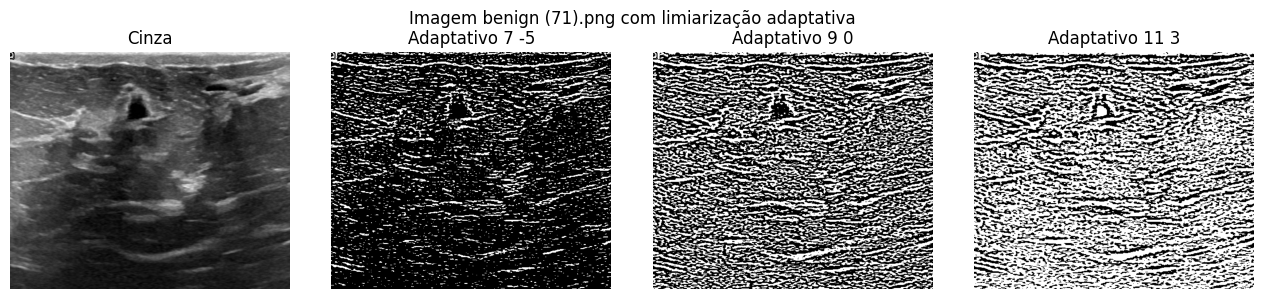

In [23]:
def threshold_adaptativo(imagem, janela=7, c=-5):
  return cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, janela, c)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_filtrada = threshold_adaptativo(imagem_cinza)
imagem_cinza_filtrada2 = threshold_adaptativo(imagem_cinza,9,0)
imagem_cinza_filtrada3 = threshold_adaptativo(imagem_cinza,11,3)

plt.figure(figsize=(13,3))
f, ax = plt.subplots(1,4)
plt.gcf().set_size_inches(13, 3)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_filtrada, cmap='gray')
ax[1].set_title('Adaptativo 7 -5')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_filtrada2, cmap='gray')
ax[2].set_title('Adaptativo 9 0')
ax[2].axis('off')
ax[3].imshow(imagem_cinza_filtrada3, cmap='gray')
ax[3].set_title('Adaptativo 11 3')
ax[3].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com limiarização adaptativa")
plt.tight_layout()
plt.show()

###Limiarização Otsu

<Figure size 1000x500 with 0 Axes>

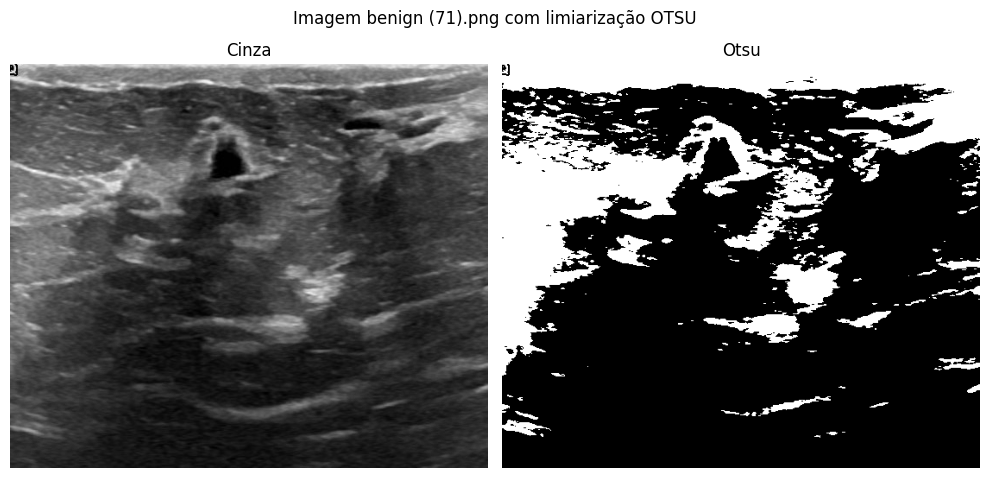

In [24]:
def threshold_OTSU(imagem):
  _, img = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return img

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_filtrada = threshold_OTSU(imagem_cinza)

plt.figure(figsize=(10,5))
f, ax = plt.subplots(1,2)
plt.gcf().set_size_inches(10, 5)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_filtrada, cmap='gray')
ax[1].set_title('Otsu')
ax[1].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com limiarização OTSU")
plt.tight_layout()
plt.show()

### Filtros Morfológicos

<Figure size 1000x1000 with 0 Axes>

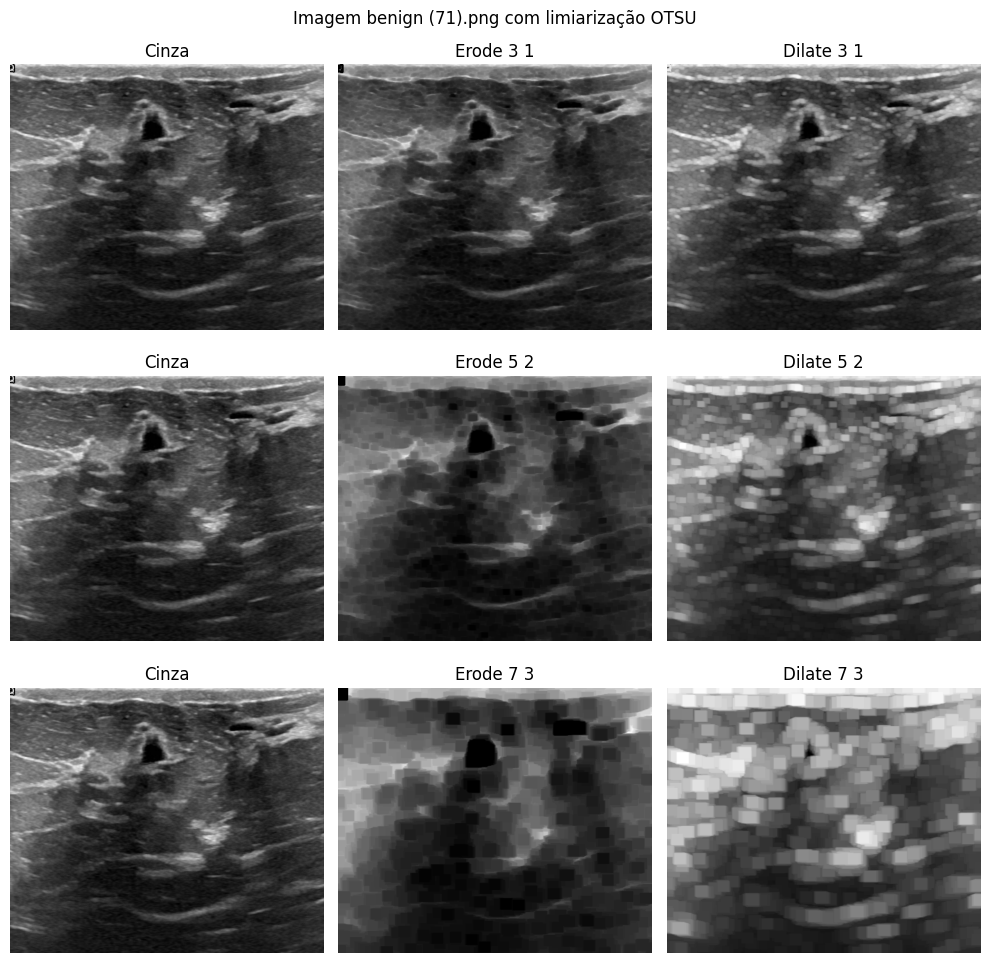

In [25]:
def filtro_morph(imagem, ksize=(3,3), it=1):
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
  erode = cv2.erode(imagem, kernel, iterations=it)
  dilate = cv2.dilate(imagem, kernel, iterations=it)
  return erode, dilate

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_erode, imagem_cinza_dilate = filtro_morph(imagem_cinza)
imagem_cinza_erode1, imagem_cinza_dilate1 = filtro_morph(imagem_cinza, (5,5), 2)
imagem_cinza_erode2, imagem_cinza_dilate2 = filtro_morph(imagem_cinza, (7,7), 3)

plt.figure(figsize=(10,10))
f, ax = plt.subplots(3,3)
plt.gcf().set_size_inches(10, 10)

ax[0,0].imshow(imagem_cinza, cmap='gray')
ax[0,0].set_title('Cinza')
ax[0,0].axis('off')
ax[0,1].imshow(imagem_cinza_erode, cmap='gray')
ax[0,1].set_title('Erode 3 1')
ax[0,1].axis('off')
ax[0,2].imshow(imagem_cinza_dilate, cmap='gray')
ax[0,2].set_title('Dilate 3 1')
ax[0,2].axis('off')

ax[1,0].imshow(imagem_cinza, cmap='gray')
ax[1,0].set_title('Cinza')
ax[1,0].axis('off')
ax[1,1].imshow(imagem_cinza_erode1, cmap='gray')
ax[1,1].set_title('Erode 5 2')
ax[1,1].axis('off')
ax[1,2].imshow(imagem_cinza_dilate1, cmap='gray')
ax[1,2].set_title('Dilate 5 2')
ax[1,2].axis('off')

ax[2,0].imshow(imagem_cinza, cmap='gray')
ax[2,0].set_title('Cinza')
ax[2,0].axis('off')
ax[2,1].imshow(imagem_cinza_erode2, cmap='gray')
ax[2,1].set_title('Erode 7 3')
ax[2,1].axis('off')
ax[2,2].imshow(imagem_cinza_dilate2, cmap='gray')
ax[2,2].set_title('Dilate 7 3')
ax[2,2].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com limiarização OTSU")
plt.tight_layout()
plt.show()

### Operador Sobel

<Figure size 1800x500 with 0 Axes>

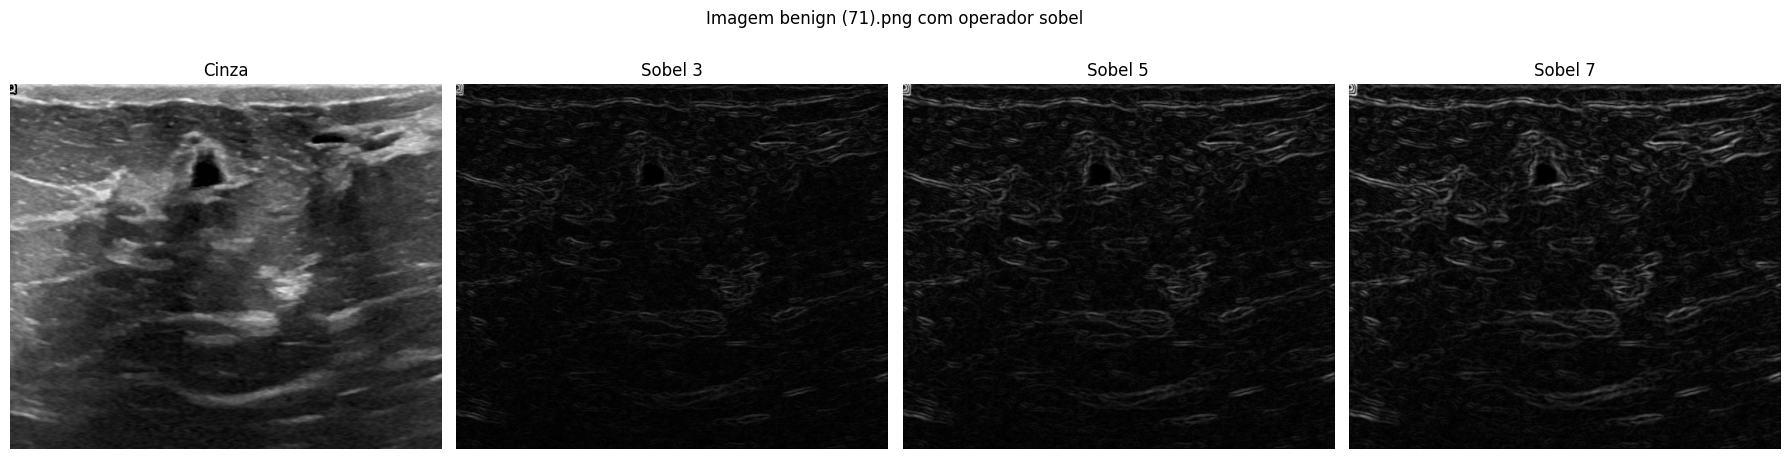

In [26]:
def operador_sobel(imagem, ksize=3):
  # Aplicando operador nas direções horizontal e vertical
  sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=ksize)
  sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=ksize)
  # Convertendo resultados para valores absolutos
  sobel_x = np.absolute(sobel_x)
  sobel_y = np.absolute(sobel_y)
  # Retornando o gradiente total
  return cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_sobel = operador_sobel(imagem_cinza)
imagem_cinza_sobel1 = operador_sobel(imagem_cinza, 5)
imagem_cinza_sobel2 = operador_sobel(imagem_cinza, 7)

plt.figure(figsize=(18,5))
f, ax = plt.subplots(1,4)
plt.gcf().set_size_inches(18,5)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_sobel, cmap='gray')
ax[1].set_title('Sobel 3')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_sobel1, cmap='gray')
ax[2].set_title('Sobel 5')
ax[2].axis('off')
ax[3].imshow(imagem_cinza_sobel2, cmap='gray')
ax[3].set_title('Sobel 7')
ax[3].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com operador sobel")
plt.tight_layout()
plt.show()

### Operador Canny

<Figure size 1800x500 with 0 Axes>

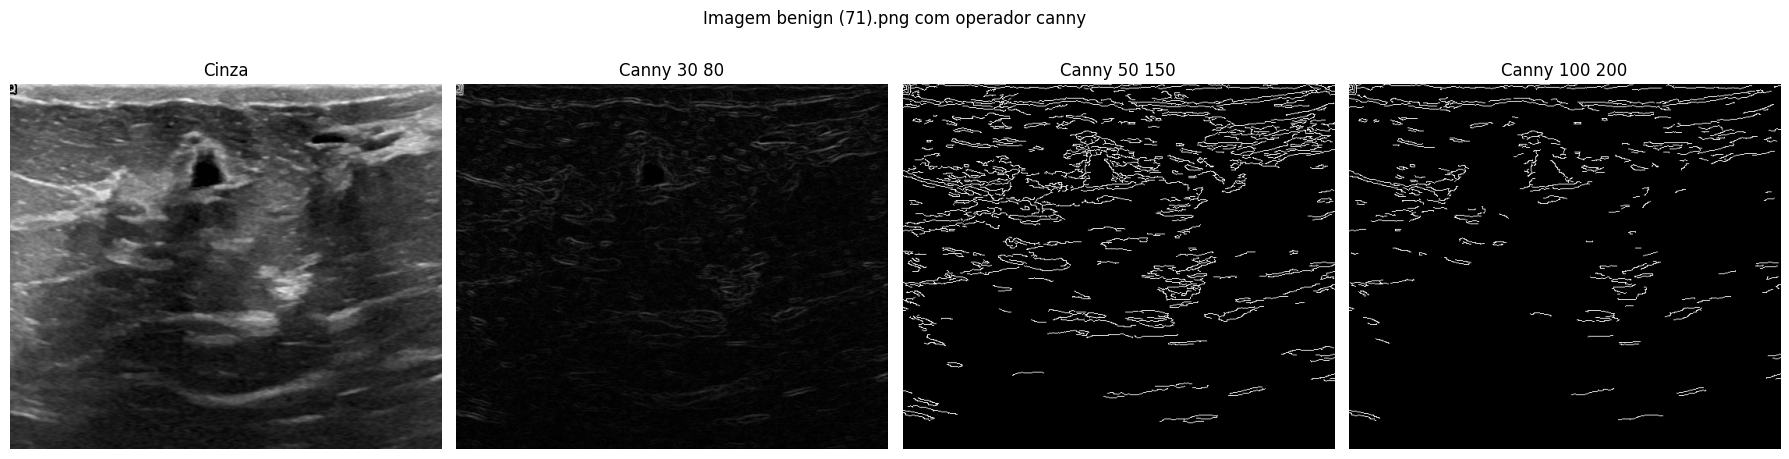

In [27]:
def operador_canny(imagem, threshold1=30, threshold2=80):
  return cv2.Canny(imagem.astype(np.uint8), threshold1=threshold1, threshold2=threshold2)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_canny = operador_canny(imagem_cinza)
imagem_cinza_canny1 = operador_canny(imagem_cinza, 50, 150)
imagem_cinza_canny2 = operador_canny(imagem_cinza, 100, 200)

plt.figure(figsize=(18,5))
f, ax = plt.subplots(1,4)
plt.gcf().set_size_inches(18,5)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_sobel, cmap='gray')
ax[1].set_title('Canny 30 80')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_canny1, cmap='gray')
ax[2].set_title('Canny 50 150')
ax[2].axis('off')
ax[3].imshow(imagem_cinza_canny2, cmap='gray')
ax[3].set_title('Canny 100 200')
ax[3].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com operador canny")
plt.tight_layout()
plt.show()

### Transformada de Hough

<Figure size 1800x500 with 0 Axes>

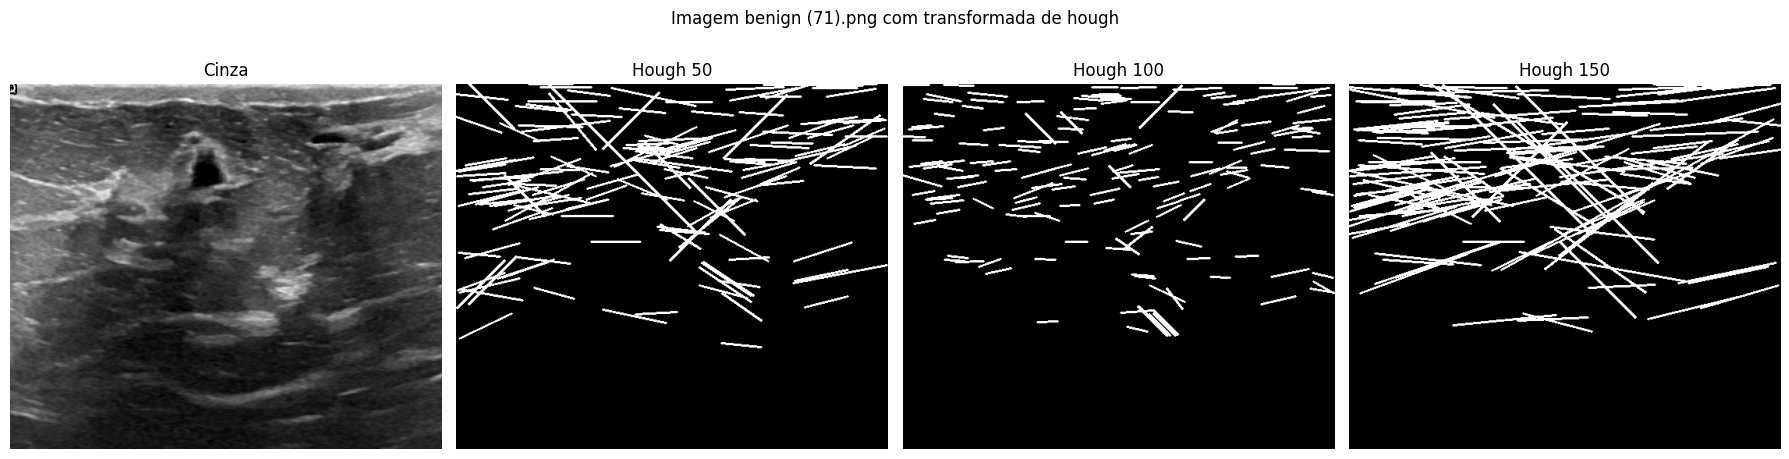

In [28]:
def transf_hough(imagem, threshold=50, mll=50, mlg=10):
  # Aplicando Canny para detecção de bordas
  bordas = operador_canny(imagem, 30, 100)
  # Aplicando a Transformada de Hough para detecção de linhas
  linhas = cv2.HoughLinesP(bordas, 1, np.pi / 180, threshold=threshold, minLineLength=mll, maxLineGap=mlg)
  # Desenhando linhas detectadas na imagem original
  imagem_com_linhas = np.zeros_like(imagem.copy())
  for linha in linhas:
    x1, y1, x2, y2 = linha[0]
    cv2.line(imagem_com_linhas, (x1, y1), (x2, y2), 255, 2)
  return cv2.normalize(imagem_com_linhas, None, 0, 255, cv2.NORM_MINMAX)

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_hough = transf_hough(imagem_cinza)
imagem_cinza_hough1 = transf_hough(imagem_cinza, 100, 25, 5)
imagem_cinza_hough2 = transf_hough(imagem_cinza, 100, 75, 15)

plt.figure(figsize=(18,5))
f, ax = plt.subplots(1,4)
plt.gcf().set_size_inches(18,5)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_hough, cmap='gray')
ax[1].set_title('Hough 50')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_hough1, cmap='gray')
ax[2].set_title('Hough 100')
ax[2].axis('off')
ax[3].imshow(imagem_cinza_hough2, cmap='gray')
ax[3].set_title('Hough 150')
ax[3].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com transformada de hough")
plt.tight_layout()
plt.show()

### Combinando Filtros

<Figure size 1000x1000 with 0 Axes>

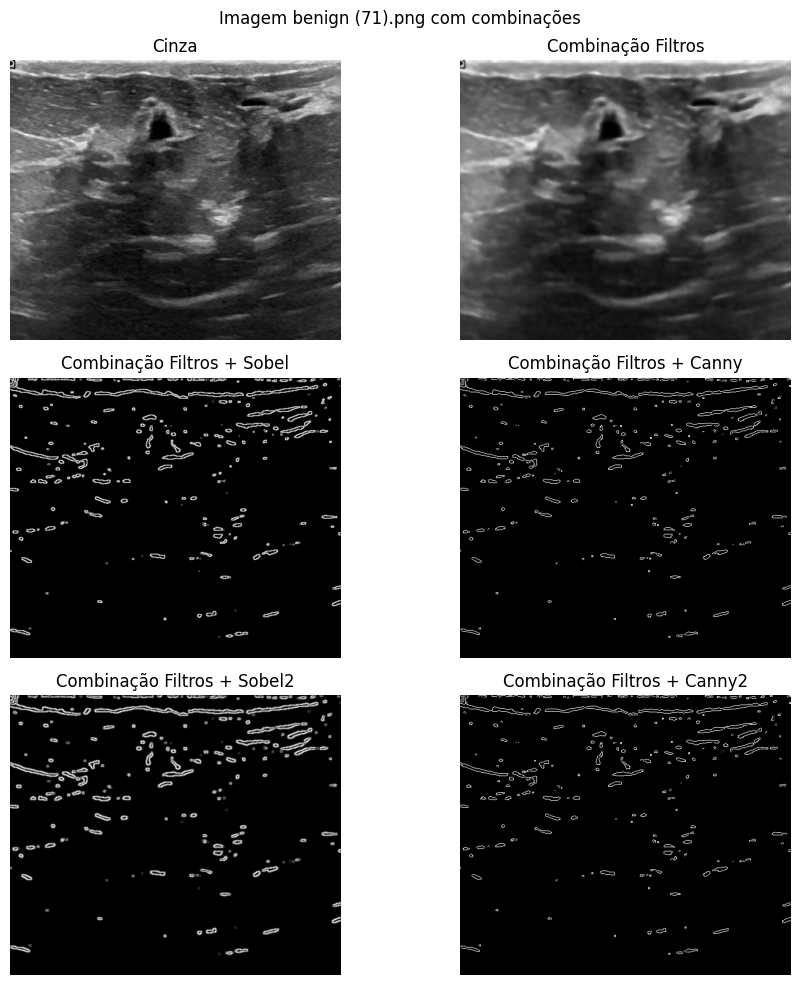

In [29]:
imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
comb_filt = filtro_bilateral(filtro_gaussiano(filtro_mediana(imagem_cinza)))
comb_sobel = operador_sobel(threshold_adaptativo(comb_filt))
comb_canny = operador_canny(threshold_adaptativo(comb_filt))
comb_sobel2 = operador_sobel(threshold_adaptativo(comb_filt),5)
comb_canny2 = operador_canny(threshold_adaptativo(comb_filt),50,150)

plt.figure(figsize=(10,10))
f, ax = plt.subplots(3,2)
plt.gcf().set_size_inches(10, 10)

ax[0,0].imshow(imagem_cinza, cmap='gray')
ax[0,0].set_title('Cinza')
ax[0,0].axis('off')
ax[0,1].imshow(comb_filt, cmap='gray')
ax[0,1].set_title('Combinação Filtros')
ax[0,1].axis('off')

ax[1,0].imshow(comb_sobel, cmap='gray')
ax[1,0].set_title('Combinação Filtros + Sobel')
ax[1,0].axis('off')
ax[1,1].imshow(comb_canny, cmap='gray')
ax[1,1].set_title('Combinação Filtros + Canny')
ax[1,1].axis('off')

ax[2,0].imshow(comb_sobel2, cmap='gray')
ax[2,0].set_title('Combinação Filtros + Sobel2')
ax[2,0].axis('off')
ax[2,1].imshow(comb_canny2, cmap='gray')
ax[2,1].set_title('Combinação Filtros + Canny2')
ax[2,1].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com combinações")
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

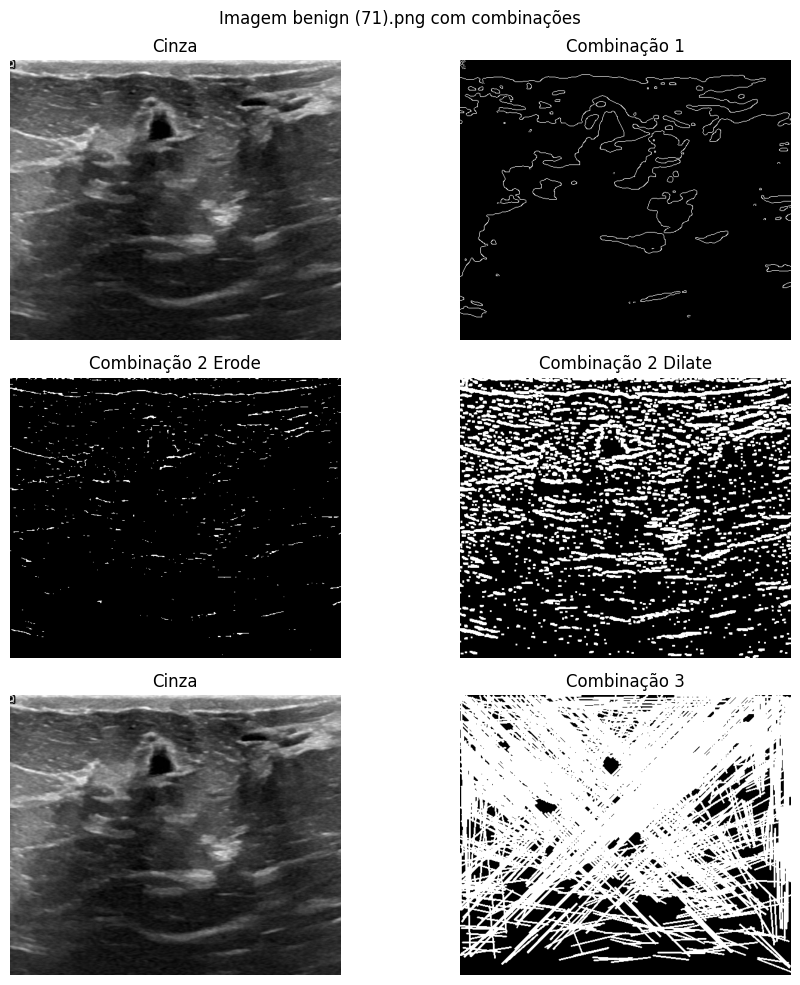

In [30]:
imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_combinacao = operador_canny(threshold_OTSU(filtro_bilateral(imagem_cinza)))
imagem_combinacao_erode, imagem_combinacao_dilate = filtro_morph(threshold_adaptativo(filtro_gaussiano(imagem_cinza)))
imagem_combinacao2 = transf_hough(operador_sobel(filtro_mediana(imagem_cinza)))

plt.figure(figsize=(10,10))
f, ax = plt.subplots(3,2)
plt.gcf().set_size_inches(10, 10)

ax[0,0].imshow(imagem_cinza, cmap='gray')
ax[0,0].set_title('Cinza')
ax[0,0].axis('off')
ax[0,1].imshow(imagem_combinacao, cmap='gray')
ax[0,1].set_title('Combinação 1')
ax[0,1].axis('off')

ax[1,0].imshow(imagem_combinacao_erode, cmap='gray')
ax[1,0].set_title('Combinação 2 Erode')
ax[1,0].axis('off')
ax[1,1].imshow(imagem_combinacao_dilate, cmap='gray')
ax[1,1].set_title('Combinação 2 Dilate')
ax[1,1].axis('off')

ax[2,0].imshow(imagem_cinza, cmap='gray')
ax[2,0].set_title('Cinza')
ax[2,0].axis('off')
ax[2,1].imshow(imagem_combinacao2, cmap='gray')
ax[2,1].set_title('Combinação 3')
ax[2,1].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com combinações")
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

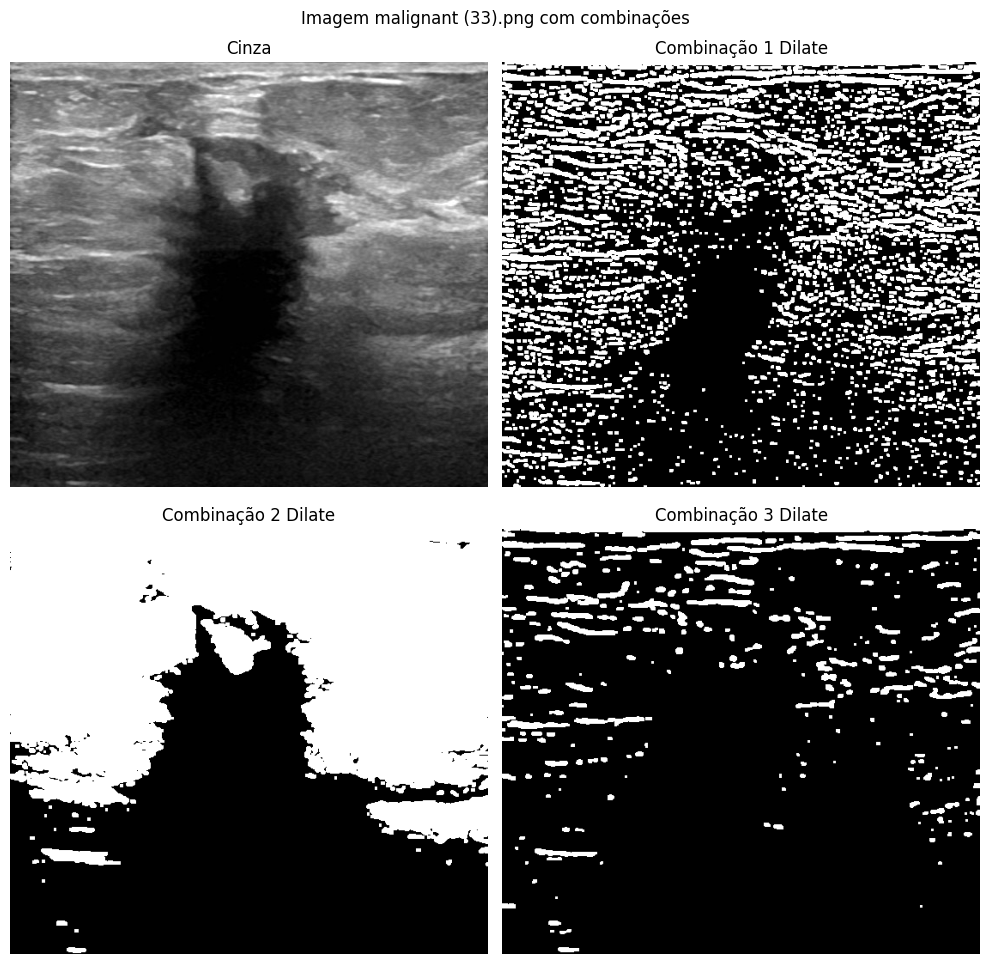

In [31]:
imagem_cinza = cv2.imread(dataframe['Original'][574], cv2.IMREAD_GRAYSCALE)
imagem_combinacao_erode, imagem_combinacao_dilate = filtro_morph(threshold_adaptativo(filtro_gaussiano(imagem_cinza)))
imagem_combinacao_erode2, imagem_combinacao_dilate2 = filtro_morph(threshold_OTSU(filtro_mediana(imagem_cinza)))
imagem_combinacao_erode3, imagem_combinacao_dilate3 = filtro_morph(threshold_adaptativo(filtro_bilateral(imagem_cinza)))

plt.figure(figsize=(10,10))
f, ax = plt.subplots(2,2)
plt.gcf().set_size_inches(10, 10)

ax[0,0].imshow(imagem_cinza, cmap='gray')
ax[0,0].set_title('Cinza')
ax[0,0].axis('off')
ax[0,1].imshow(imagem_combinacao_dilate, cmap='gray')
ax[0,1].set_title('Combinação 1 Dilate')
ax[0,1].axis('off')

ax[1,0].imshow(imagem_combinacao_dilate2, cmap='gray')
ax[1,0].set_title('Combinação 2 Dilate')
ax[1,0].axis('off')
ax[1,1].imshow(imagem_combinacao_dilate3, cmap='gray')
ax[1,1].set_title('Combinação 3 Dilate')
ax[1,1].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][574]} com combinações")
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

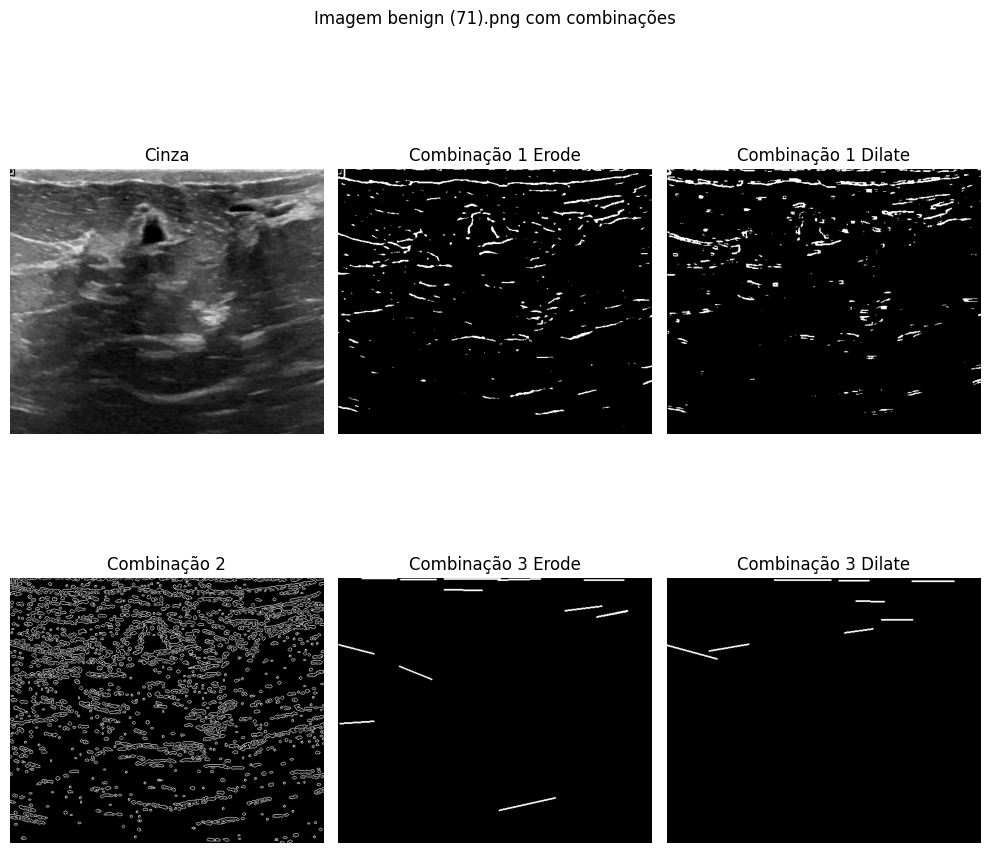

In [32]:
imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
erode, dilate = filtro_morph(filtro_mediana(filtro_bilateral(imagem_cinza)))
imagem_combinacao_erode = threshold_adaptativo(erode)
imagem_combinacao_dilate = threshold_adaptativo(dilate)
imagem_combinacao1 = operador_canny(operador_sobel(threshold_adaptativo(filtro_gaussiano(filtro_mediana(imagem_cinza)))))
erode, dilate = filtro_morph(filtro_bilateral(imagem_cinza))
imagem_combinacao2_erode = transf_hough(erode)
imagem_combinacao2_dilate = transf_hough(dilate)

plt.figure(figsize=(10,10))
f, ax = plt.subplots(2,3)
plt.gcf().set_size_inches(10, 10)

ax[0,0].imshow(imagem_cinza, cmap='gray')
ax[0,0].set_title('Cinza')
ax[0,0].axis('off')
ax[0,1].imshow(imagem_combinacao_erode, cmap='gray')
ax[0,1].set_title('Combinação 1 Erode')
ax[0,1].axis('off')
ax[0,2].imshow(imagem_combinacao_dilate, cmap='gray')
ax[0,2].set_title('Combinação 1 Dilate')
ax[0,2].axis('off')

ax[1,0].imshow(imagem_combinacao1, cmap='gray')
ax[1,0].set_title('Combinação 2')
ax[1,0].axis('off')
ax[1,1].imshow(imagem_combinacao2_erode, cmap='gray')
ax[1,1].set_title('Combinação 3 Erode')
ax[1,1].axis('off')
ax[1,2].imshow(imagem_combinacao2_dilate, cmap='gray')
ax[1,2].set_title('Combinação 3 Dilate')
ax[1,2].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} com combinações")
plt.tight_layout()
plt.show()

##Normalização

In [33]:
def norm(imagem):
  return imagem / 255.0

def norm_dist(imagem):
  min = imagem.min()
  max = imagem.max()
  return ((imagem - min) * (255.0 / (max - min)))

imagem_cinza = cv2.imread(dataframe['Original'][406], cv2.IMREAD_GRAYSCALE)
imagem_cinza_normalizada = norm(imagem_cinza)
imagem_cinza_normalizada2 = norm_dist(imagem_cinza)

print(f"Imagem cinza: Máximo - {imagem_cinza.max()}, Mínimo - {imagem_cinza.min()}, Média - {imagem_cinza.mean()}")
print(f"Imagem cinza normalizada: Máximo - {imagem_cinza_normalizada.max()}, Mínimo - {imagem_cinza_normalizada.min()}, Média - {imagem_cinza_normalizada.mean()}")
print(f"Imagem cinza normalizada 2: Máximo - {imagem_cinza_normalizada2.max()}, Mínimo - {imagem_cinza_normalizada2.min()}, Média - {imagem_cinza_normalizada2.mean()}")

Imagem cinza: Máximo - 227, Mínimo - 0, Média - 60.87136776150193
Imagem cinza normalizada: Máximo - 0.8901960784313725, Mínimo - 0.0, Média - 0.238711246123537
Imagem cinza normalizada 2: Máximo - 255.00000000000003, Mínimo - 0.0, Média - 68.37973030477089


<Figure size 640x480 with 0 Axes>

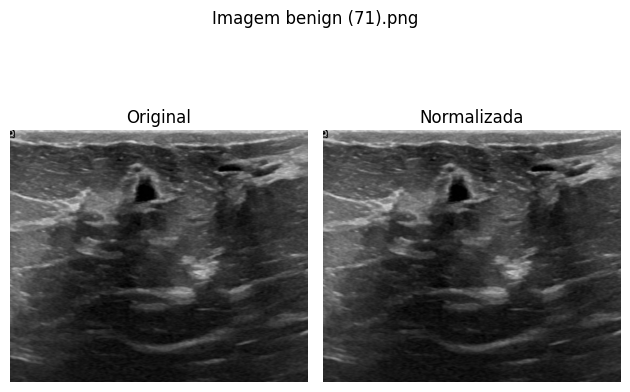

In [34]:
plt.figure()

f, ax = plt.subplots(1,2)
img406 = cv2.imread(dataframe['Original'][406])

ax[0].imshow(img406)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(norm(img406))
ax[1].set_title('Normalizada')
ax[1].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]}")
plt.tight_layout()
plt.show()

<Figure size 1000x300 with 0 Axes>

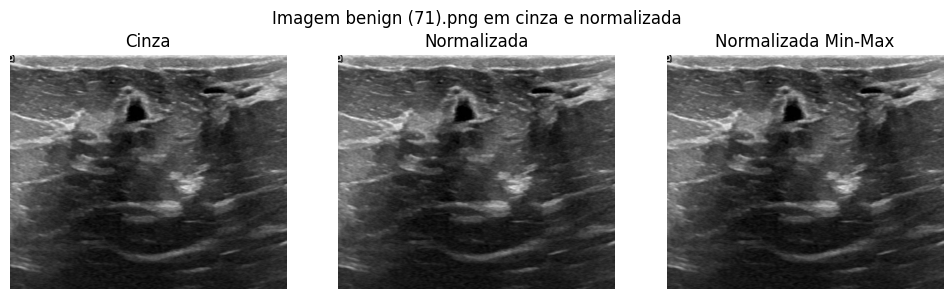

In [35]:
plt.figure(figsize=(10,3))
f, ax = plt.subplots(1,3)
plt.gcf().set_size_inches(10, 3)

ax[0].imshow(imagem_cinza, cmap='gray')
ax[0].set_title('Cinza')
ax[0].axis('off')
ax[1].imshow(imagem_cinza_normalizada, cmap='gray')
ax[1].set_title('Normalizada')
ax[1].axis('off')
ax[2].imshow(imagem_cinza_normalizada2, cmap='gray')
ax[2].set_title('Normalizada Min-Max')
ax[2].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][406]} em cinza e normalizada")
plt.tight_layout()
plt.show()

##Binarização

In [37]:
def binarizacao(imagem, limiar):
  _, mascara =  cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
  mascara_binaria = np.where(mascara == 255, 1, 0)
  return mascara_binaria

<Figure size 640x480 with 0 Axes>

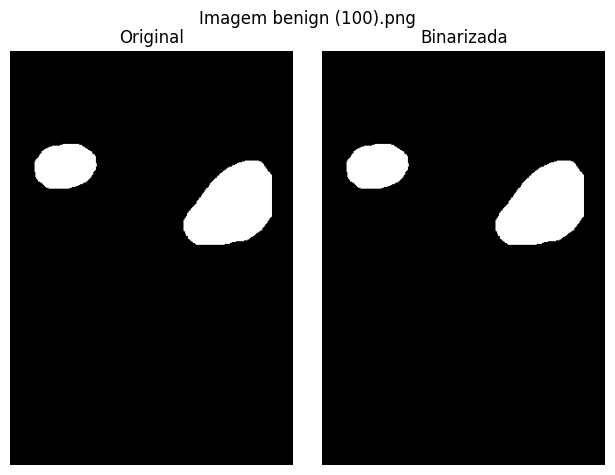

In [57]:
plt.figure()

f, ax = plt.subplots(1,2)
img406 = cv2.imread(dataframe['Ground Truth'][2],0)

ax[0].imshow(img406, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(binarizacao2(img406), cmap='gray')
ax[1].set_title('Binarizada')
ax[1].axis('off')

plt.suptitle(f"Imagem {dataframe['Nome'][2]}")
plt.tight_layout()
plt.show()

#Modelos

## Embaralhando o DataFrame

In [35]:
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold

seed = 10
np.random.seed(seed)

In [36]:
dataframe.head(10)

Nome Categoria  \
0    benign (1).png    benign   
1   benign (10).png    benign   
2  benign (100).png    benign   
3  benign (101).png    benign   
4  benign (102).png    benign   
5  benign (103).png    benign   
6  benign (104).png    benign   
7  benign (105).png    benign   
8  benign (106).png    benign   
9  benign (107).png    benign   

                                            Original  \
0  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
1  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
2  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
3  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
4  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
5  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
6  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
7  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
8  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
9  /content/dataset_projeto/Dataset_BUSI_with_GT/...   

                                        Ground Truth  
0  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
1  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
2  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
3  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
4  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
5  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
6  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
7  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
8  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
9  /content/dataset_projeto/Dataset_BUSI_with_GT/...

In [37]:
# Embaralhando o dataframe
df_embaralhado = dataframe.sample(frac=1, random_state=seed)
df_embaralhado = df_embaralhado.reset_index(drop=True)
df_embaralhado.head(10)

Nome  Categoria  \
0     benign (73).png     benign   
1    benign (138).png     benign   
2    benign (396).png     benign   
3    benign (371).png     benign   
4    benign (257).png     benign   
5    benign (418).png     benign   
6  malignant (28).png  malignant   
7    benign (319).png     benign   
8    benign (240).png     benign   
9    benign (123).png     benign   

                                            Original  \
0  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
1  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
2  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
3  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
4  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
5  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
6  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
7  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
8  /content/dataset_projeto/Dataset_BUSI_with_GT/...   
9  /content/dataset_projeto/Dataset_BUSI_with_GT/...   

                                        Ground Truth  
0  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
1  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
2  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
3  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
4  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
5  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
6  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
7  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
8  /content/dataset_projeto/Dataset_BUSI_with_GT/...  
9  /content/dataset_projeto/Dataset_BUSI_with_GT/...

## Modelo Classificação

### Dividindo em Teste, Treino e Validação

In [37]:
# Dividindo os dados para treino (70%) e teste (30%)
# x = ultrassonografias / y = categorias
x_treino, x_teste, y_treino, y_teste = train_test_split(df_embaralhado['Original'], df_embaralhado['Categoria'], test_size = 0.3, random_state = seed, stratify = df_embaralhado['Categoria'])

In [38]:
print(f'Tamanho X treino: {x_treino.shape[0]}, Tamanho X teste: {x_teste.shape[0]}')
print(f'Tamanho Y treino: {y_treino.shape[0]}, Tamanho Y teste: {y_teste.shape[0]}')

Tamanho X treino: 546, Tamanho X teste: 234
Tamanho Y treino: 546, Tamanho Y teste: 234


### Pré-processando as imagens e rótulos

In [39]:
# Pré processando as imagens de teste e treino
def pre_process(img):
  img_equalizada = equalizar_hist(cv2.imread(img, 0)) # Carregando canal p&b da imagem e equalizando o histograma
  img_redimensionada = redimensionar(img_equalizada, 190) # Redimensionando para 190x190
  img_normalizada = norm(img_redimensionada) # Normalizando os pixels entre 0 e 1
  return img_normalizada

x_treino_processado = []
x_teste_processado = []

# Passando cada imagem pelo pré-processamento
for imagem in x_treino:
  x_treino_processado.append(pre_process(imagem))

for imagem in x_teste:
  x_teste_processado.append(pre_process(imagem))

# Convertendo de lista para array numpy
x_treino_processado = np.array(x_treino_processado)
x_teste_processado = np.array(x_teste_processado)

In [40]:
# Codificando as categorias (normal, benign e malignant)
# Primeiro transforma cada categoria em número inteiro (0, 1, 2)
# Depois em one-hot-encoding (binário 0 ou 1)
le = LabelEncoder()
y_treino_num = le.fit_transform(y_treino)
y_teste_num = le.transform(y_teste)

y_treino_processado = tf.keras.utils.to_categorical(y_treino_num, num_classes=3)
y_teste_processado = tf.keras.utils.to_categorical(y_teste_num, num_classes=3)

In [41]:
print(f'Categoria inicial: {y_teste.iloc[[2]].values[0]}, Categoria numérica inteira: {y_teste_num[2]}, Categoria binária: {y_teste_processado[2]}')

Categoria inicial: benign, Categoria numérica inteira: 0, Categoria binária: [1. 0. 0.]


In [42]:
print(f'Categoria inicial: {y_teste.iloc[[1]].values[0]}, Categoria numérica inteira: {y_teste_num[1]}, Categoria binária: {y_teste_processado[1]}')

Categoria inicial: malignant, Categoria numérica inteira: 1, Categoria binária: [0. 1. 0.]


In [43]:
print(f'Categoria inicial: {y_teste.iloc[[4]].values[0]}, Categoria numérica inteira: {y_teste_num[4]}, Categoria binária: {y_teste_processado[4]}')

Categoria inicial: normal, Categoria numérica inteira: 2, Categoria binária: [0. 0. 1.]


### Modelo MLP - Multilayer Perceptron

In [44]:
# Definindo modelo MLP
modelo_mlp = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(190, 190)), # transforma a imagem 2D em um vetor 1D
    tf.keras.layers.Dense(128, activation='relu'), # camada densa com 128 neurônios e ativação ReLU
    tf.keras.layers.Dropout(0.2), # usado para reduzir o overfitting - 20% dos neurônios serão desligados aleatoriamente
    tf.keras.layers.Dense(64, activation='relu'), # camada densa com 64 neurônios e ativação ReLU
    tf.keras.layers.Dropout(0.2), # outra dropout com 20% de redução
    tf.keras.layers.Dense(3, activation='softmax')  # camada de saída com 3 neurônios (1 para cada classe) e softmax para classificação
])

In [45]:
# Complinando modelo MLP
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelo_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 36100)             0         
                                                                 
 dense (Dense)               (None, 128)               4620928   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4629379 (17.66 MB)
Trainable params: 46293

In [46]:
# Treinando modelo MLP
modelo_mlp.fit(x_treino_processado, y_treino_processado, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
16/16 [==============================] - 2s 75ms/step - loss: 6.5321 - accuracy: 0.4196 - val_loss: 2.4067 - val_accuracy: 0.6364
Epoch 2/10
16/16 [==============================] - 1s 58ms/step - loss: 2.2484 - accuracy: 0.4440 - val_loss: 1.0084 - val_accuracy: 0.6364
Epoch 3/10
16/16 [==============================] - 1s 64ms/step - loss: 1.0087 - accuracy: 0.5723 - val_loss: 0.9093 - val_accuracy: 0.6727
Epoch 4/10
16/16 [==============================] - 1s 63ms/step - loss: 1.0001 - accuracy: 0.5601 - val_loss: 0.9074 - val_accuracy: 0.6364
Epoch 5/10
16/16 [==============================] - 1s 71ms/step - loss: 0.9671 - accuracy: 0.5479 - val_loss: 0.9523 - val_accuracy: 0.6364
Epoch 6/10
16/16 [==============================] - 1s 91ms/step - loss: 0.9612 - accuracy: 0.5499 - val_loss: 0.8915 - val_accuracy: 0.6364
Epoch 7/10
16/16 [==============================] - 1s 78ms/step - loss: 0.9289 - accuracy: 0.5499 - val_loss: 0.9453 - val_accuracy: 0.6364
Epoch 8/10
16

In [47]:
# Avaliando modelo MLP
resultado_mlp = modelo_mlp.evaluate(x_teste_processado, y_teste_processado)
print(f'Acurácia no conjunto de teste: {resultado_mlp[1]*100:.2f}%')

8/8 [==============================] - 0s 11ms/step - loss: 0.9603 - accuracy: 0.5598
Acurácia no conjunto de teste: 55.98%


### Modelo CNN - Convolutional Neural Network

In [48]:
# Definindo modelo CNN
modelo_cnn = tf.keras.Sequential([
    # Primeira camada convolucional
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(190, 190, 1)), # camada convolucional com 32 filtros de tamanho 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # pooling para reduzir a dimensionalidade

    # Segunda camada convolucional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # camada convolucional com 64 filtros de tamanho 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # pooling para reduzir a dimensionalidade

    # Terceira camada convolucional
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),# camada convolucional com 128 filtros de tamanho 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # pooling para reduzir a dimensionalidade

    tf.keras.layers.Flatten(), # transformando em vetor unidimensional
    tf.keras.layers.Dense(128, activation='relu'), # camada densa com 128 neurônios com ativação ReLU
    tf.keras.layers.Dropout(0.2), # usado para reduzir o overfitting - 20% dos neurônios serão desligados aleatoriamente
    tf.keras.layers.Dense(3, activation='softmax') # camada de saída com 3 neurônios (1 para cada classe) e softmax para classificação
])

In [49]:
# Compilando modelo CNN
modelo_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelo_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 188, 188, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 94, 94, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 128)      

In [50]:
# Treinando modelo CNN
modelo_cnn.fit(x_treino_processado, y_treino_processado, epochs=10)

Epoch 1/10
18/18 [==============================] - 53s 3s/step - loss: 1.0532 - accuracy: 0.5531
Epoch 2/10
18/18 [==============================] - 46s 2s/step - loss: 1.0205 - accuracy: 0.5788
Epoch 3/10
18/18 [==============================] - 44s 2s/step - loss: 0.8546 - accuracy: 0.6300
Epoch 4/10
18/18 [==============================] - 39s 2s/step - loss: 0.8002 - accuracy: 0.6685
Epoch 5/10
18/18 [==============================] - 38s 2s/step - loss: 0.6950 - accuracy: 0.7363
Epoch 6/10
18/18 [==============================] - 39s 2s/step - loss: 0.5968 - accuracy: 0.7363
Epoch 7/10
18/18 [==============================] - 39s 2s/step - loss: 0.4766 - accuracy: 0.8022
Epoch 8/10
18/18 [==============================] - 39s 2s/step - loss: 0.4098 - accuracy: 0.8407
Epoch 9/10
18/18 [==============================] - 38s 2s/step - loss: 0.3702 - accuracy: 0.8443
Epoch 10/10
18/18 [==============================] - 38s 2s/step - loss: 0.3095 - accuracy: 0.8938


In [51]:
# Avaliando modelo CNN
resultado_cnn = modelo_cnn.evaluate(x_teste_processado, y_teste_processado)
print(f'Acurácia no conjunto de teste: {resultado_cnn[1]*100:.2f}%')

8/8 [==============================] - 4s 510ms/step - loss: 1.0384 - accuracy: 0.7222
Acurácia no conjunto de teste: 72.22%


## Modelo Segmentação

In [38]:
seed = 10
np.random.seed(seed)

###Dividindo em Teste, Treino e Validação

In [59]:
# Removendo as ultrassonografias sem nódulos
# df_embaralhado = df_embaralhado.loc[ddf_embaralhadof['Categoria'] != 'normal']

In [39]:
# Dividindo os dados para treino (70%) e teste (30%)
# x = ultrassonografias / y = máscaras

prop_treino = 0.7
prop_teste = 0.2
prop_val = 0.1

x_treino, x_teste, y_treino, y_teste = train_test_split(df_embaralhado['Original'], df_embaralhado['Ground Truth'], test_size = 1 - prop_treino, random_state = seed, stratify = df_embaralhado['Categoria'])
x_val, x_teste, y_val, y_teste = train_test_split(x_teste, y_teste, test_size = prop_teste/(prop_teste + prop_val), random_state = seed)

In [40]:
print(f'Tamanho X treino: {x_treino.shape[0]}, Tamanho X teste: {x_teste.shape[0]}, Tamanho X val: {x_val.shape[0]}')
print(f'Tamanho Y treino: {y_treino.shape[0]}, Tamanho Y teste: {y_teste.shape[0]}, Tamanho Y val: {y_val.shape[0]}')

Tamanho X treino: 545, Tamanho X teste: 157, Tamanho X val: 78
Tamanho Y treino: 545, Tamanho Y teste: 157, Tamanho Y val: 78


### Pré-processando as imagens e máscaras de segmentação

In [41]:
def augment_data(x, y):
    transforms = [
        lambda img: cv2.flip(img, 0),  # Espelhamento vertical
        lambda img: cv2.flip(img, 1),  # Espelhamento horizontal
        lambda img: np.rot90(img, k=1),  # Rotação de 90 graus
        filtro_gaussiano,  # Filtro gaussiano
    ]

    transform_func = np.random.choice(transforms)

    augmented_x = transform_func(pre_process(x))

    if transform_func in (cv2.flip, np.rot90):
        augmented_y = transform_func(pre_process_mask(y))
    else:
        augmented_y = pre_process_mask(y)

    return augmented_x, augmented_y

In [41]:
# Pré processando as máscaras de segmentação
def pre_process_mask(mask):
  mask_redimensionada = redimensionar(cv2.imread(mask, 0), 160) # Carregando canal p&b da máscara e redimensionando para 160x160
  mask_binarizada = binarizacao(mask_redimensionada, 127) # Binarizando para 0 e 1
  return mask_binarizada

def pre_process(img):
  img_equalizada = equalizar_hist(cv2.imread(img, 0)) # Carregando canal p&b da imagem e equalizando o histograma
  img_redimensionada = redimensionar(img_equalizada, 160) # Redimensionando para 160x160
  img_normalizada = norm(img_redimensionada) # Normalizando os pixels entre 0 e 1
  return img_normalizada

x_treino_processado = []
x_teste_processado = []
x_val_processado = []

y_treino_processado = []
y_teste_processado = []
y_val_processado = []

# Passando cada imagem pelo pré-processamento
for imagem in x_treino:
  x_treino_processado.append(pre_process(imagem))

for imagem in x_teste:
  x_teste_processado.append(pre_process(imagem))

for imagem in x_val:
  x_val_processado.append(pre_process(imagem))

for mascara in y_treino:
  y_treino_processado.append(pre_process_mask(mascara))

for mascara in y_teste:
  y_teste_processado.append(pre_process_mask(mascara))

for mascara in y_val:
  y_val_processado.append(pre_process_mask(mascara))

# for imagem, mascara in zip(x_treino, y_treino):
#   dado_novo = augment_data(imagem, mascara)
#   x_treino_processado.append(dado_novo[0])
#   y_treino_processado.append(dado_novo[1])

# for imagem, mascara in zip(x_teste, y_teste):
#   dado_novo = augment_data(imagem, mascara)
#   x_teste_processado.append(dado_novo[0])
#   y_teste_processado.append(dado_novo[1])

# for imagem, mascara in zip(x_val, y_val):
#   dado_novo = augment_data(imagem, mascara)
#   x_val_processado.append(dado_novo[0])
#   y_val_processado.append(dado_novo[1])

# Convertendo de lista para array numpy
x_treino_processado = np.array(x_treino_processado)
x_teste_processado = np.array(x_teste_processado)
x_val_processado = np.array(x_val_processado)

y_treino_processado = np.array(y_treino_processado)
y_teste_processado = np.array(y_teste_processado)
y_val_processado = np.array(y_val_processado)

In [42]:
print(x_treino_processado.shape, x_teste_processado.shape, x_val_processado.shape)

(545, 160, 160) (157, 160, 160) (78, 160, 160)


In [43]:
print(y_treino_processado.shape, y_teste_processado.shape, y_val_processado.shape)

(545, 160, 160) (157, 160, 160) (78, 160, 160)


### U-Net

In [44]:
def u_net_segmentation_model(input_shape):
  inputs = tf.keras.layers.Input(shape=input_shape)
  conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
  pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
  pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
  up4 = tf.keras.layers.concatenate([tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv3), conv2], axis=3)
  conv4 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(up4)
  up5 = tf.keras.layers.concatenate([tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv4), conv1], axis=3)
  conv5 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(up5)
  conv6 = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(conv5)

  modelo = tf.keras.models.Model(inputs=inputs, outputs=conv6)

  return modelo

In [45]:
def dice_coefficient(y_true, y_pred, smooth = 100):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + smooth) / (union + smooth)

def dice_coef_loss(y_true, y_pred):
  return 1 - dice_coefficient(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    return (intersection + 1e-8) / (union + 1e-8)

def precision(y_true, y_pred):
    true_positives = tf.reduce_sum(y_true * y_pred)
    total_positives = tf.reduce_sum(y_pred)
    return (true_positives + 1e-8) / (total_positives + 1e-8)

def recall(y_true, y_pred):
    true_positives = tf.reduce_sum(y_true * y_pred)
    actual_positives = tf.reduce_sum(y_true)
    return (true_positives + 1e-8) / (actual_positives + 1e-8)

In [51]:
# Compilando o modelo
input_shape = (160, 160, 1)  # (largura, altura, canais)
modelo_u_net = u_net_segmentation_model(input_shape)
modelo_u_net.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryFocalCrossentropy(), metrics=['accuracy', dice_coefficient, iou, precision, recall])
modelo_u_net.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 1)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 160, 160, 64)         640       ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 80, 80, 64)           0         ['conv2d_6[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 80, 80, 128)          73856     ['max_pooling2d_2[0][0]'

In [52]:
from keras import callbacks

# Treinando o modelo
with tf.device('/device:GPU:0'):
  hist = modelo_u_net.fit(x_treino_processado, y_treino_processado, epochs=200, batch_size=64, validation_data=(x_val_processado, y_val_processado),
                            callbacks = [callbacks.EarlyStopping(monitor ="val_dice_coefficient", mode ="max", patience = 10, restore_best_weights = True)])

Epoch 1/200
9/9 [==============================] - 7s 456ms/step - loss: 0.1011 - accuracy: 0.8725 - dice_coefficient: 0.1297 - iou: 0.0694 - precision: 0.0812 - recall: 0.3388 - val_loss: 0.0983 - val_accuracy: 0.8853 - val_dice_coefficient: 0.1851 - val_iou: 0.1020 - val_precision: 0.1250 - val_recall: 0.3570
Epoch 2/200
9/9 [==============================] - 4s 396ms/step - loss: 0.0809 - accuracy: 0.9231 - dice_coefficient: 0.1311 - iou: 0.0702 - precision: 0.0837 - recall: 0.3102 - val_loss: 0.0991 - val_accuracy: 0.8853 - val_dice_coefficient: 0.1794 - val_iou: 0.0986 - val_precision: 0.1265 - val_recall: 0.3086
Epoch 3/200
9/9 [==============================] - 4s 412ms/step - loss: 0.0758 - accuracy: 0.9231 - dice_coefficient: 0.1277 - iou: 0.0682 - precision: 0.0815 - recall: 0.2973 - val_loss: 0.0958 - val_accuracy: 0.8853 - val_dice_coefficient: 0.1704 - val_iou: 0.0931 - val_precision: 0.1200 - val_recall: 0.2935
Epoch 4/200
9/9 [==============================] - 4s 411ms/s

In [53]:
# Avaliando o modelo
resultado = modelo_u_net.evaluate(x_teste_processado, y_teste_processado)
print(f'Acurácia na segmentação: {resultado[1]*100:.2f}%')

5/5 [==============================] - 0s 76ms/step - loss: 0.0489 - accuracy: 0.9376 - dice_coefficient: 0.1839 - iou: 0.1017 - precision: 0.1200 - recall: 0.4235
Acurácia na segmentação: 93.76%


In [62]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!mkdir /content/drive/MyDrive/modelo

In [64]:
modelo_u_net.save('/content/drive/MyDrive/modelo/modelo_u_net')

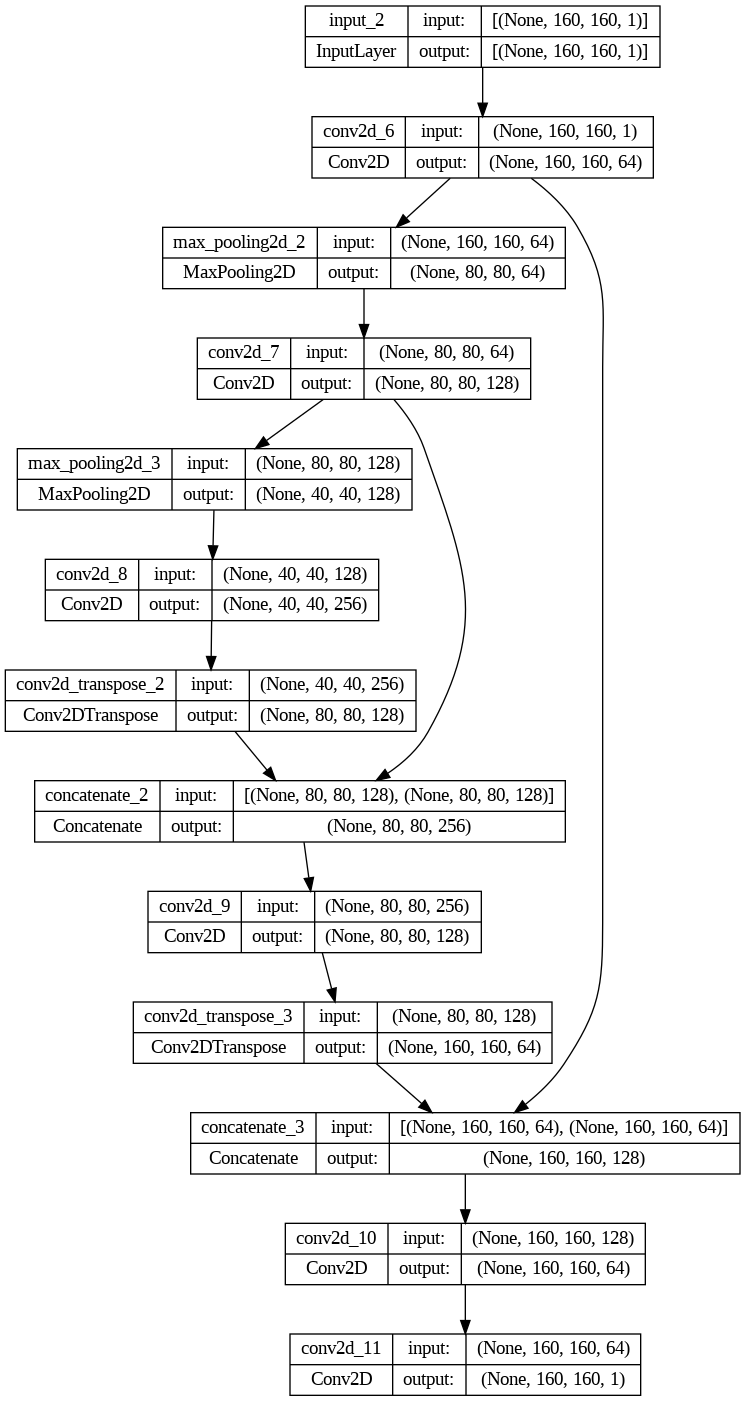

In [54]:
tf.keras.utils.plot_model(modelo_u_net, show_shapes=True, show_layer_names=True,)

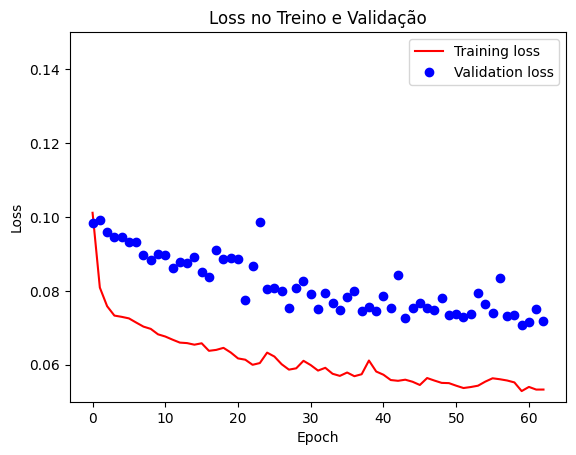

In [55]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(63)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Loss no Treino e Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.05, 0.15])
plt.legend()
plt.show()

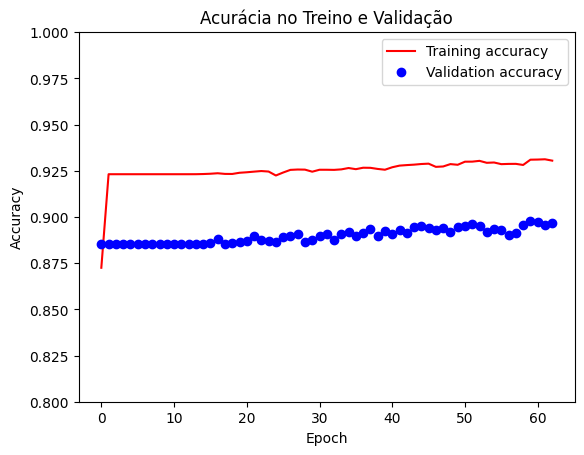

In [56]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

epochs = range(63)

plt.figure()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Acurácia no Treino e Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend()
plt.show()

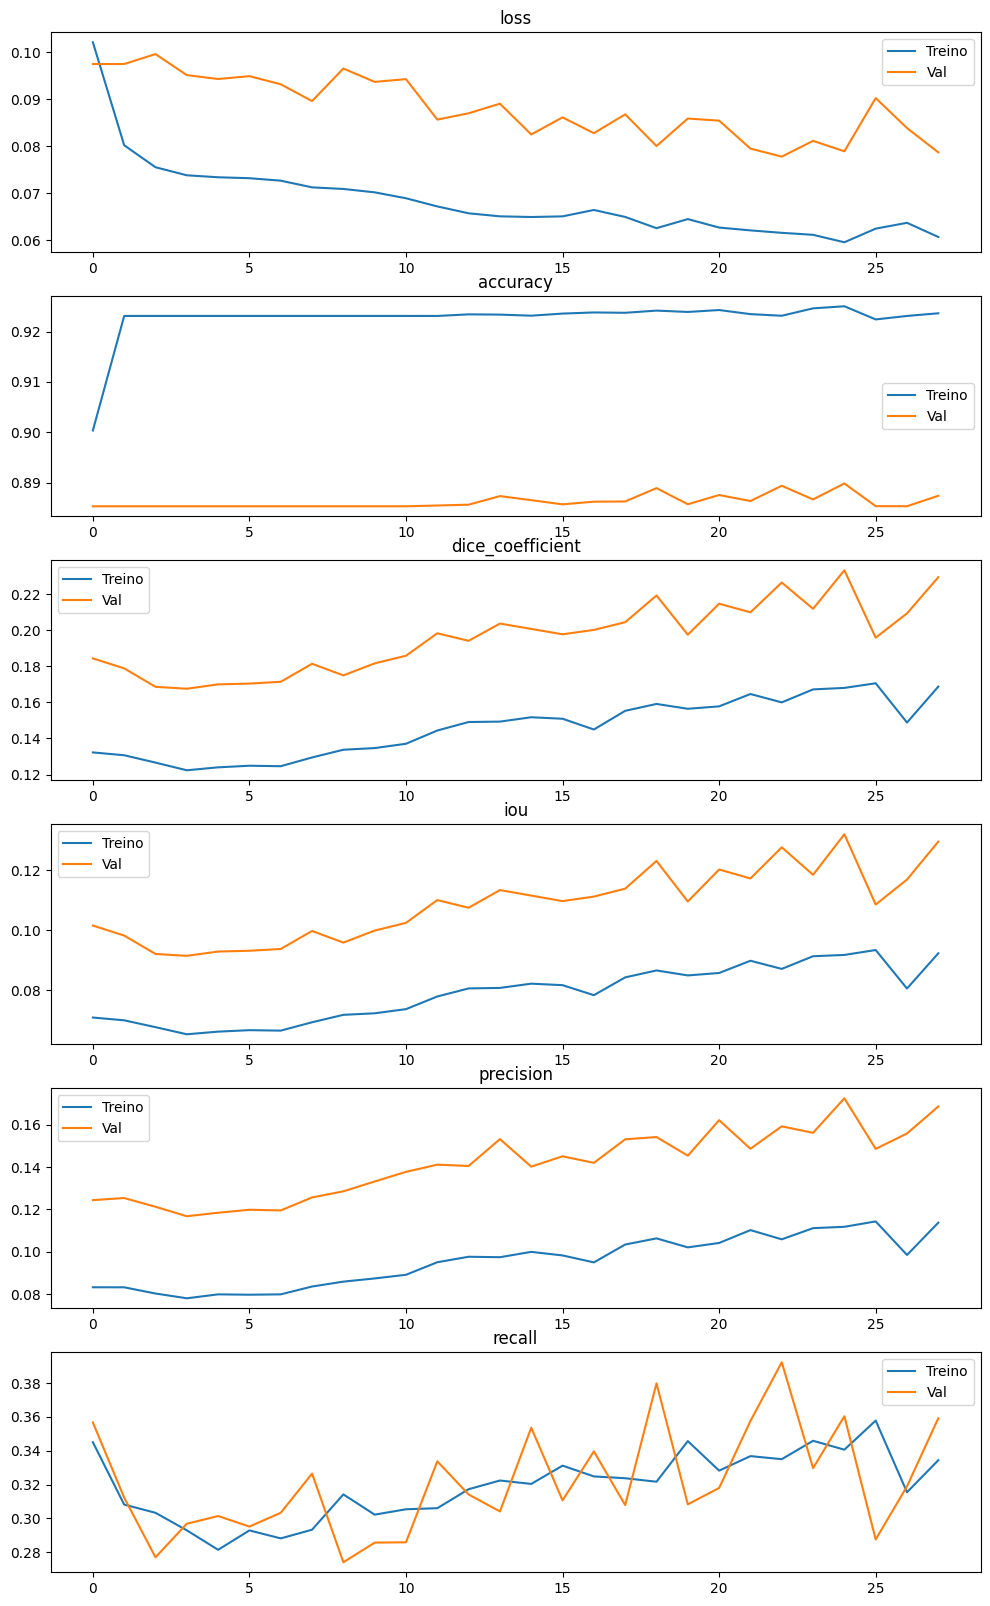

In [110]:
metrics = ['loss', 'accuracy', 'dice_coefficient', 'iou', 'precision', 'recall']
plt.figure(figsize = (12, 20))
for i in range(6):
    plt.subplot(6, 1, (i + 1))
    plt.plot(hist.history['{}'.format(metrics[i])], label = 'Treino')
    plt.plot(hist.history['val_{}'.format(metrics[i])], label = 'Val')
    plt.title('{}'.format(metrics[i]))
    plt.legend()
plt.show()

In [57]:
y_pred = modelo_u_net.predict(x_val_processado)

3/3 [==============================] - 0s 89ms/step


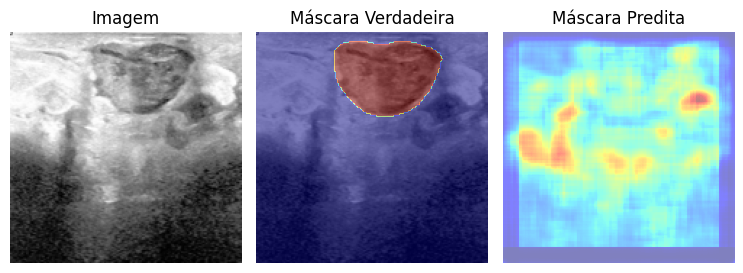

In [61]:
indice_aleatorio = np.random.randint(len(x_val_processado))

x_exemplo = x_val_processado[indice_aleatorio]
y_true_exemplo = y_val_processado[indice_aleatorio]
y_pred_exemplo = y_pred[indice_aleatorio]

plt.figure(figsize=(10, 4))

# Plotagem da Imagem
plt.subplot(141)
plt.imshow(x_exemplo, cmap='gray')
plt.title('Imagem')
plt.axis('off')

# Plotagem da Máscara Verdadeira
plt.subplot(142)
plt.imshow(x_exemplo, cmap='gray')
plt.imshow(y_true_exemplo, cmap='jet', alpha = 0.5)
plt.title('Máscara Verdadeira')
plt.axis('off')

# Plotagem da Máscara Predita
plt.subplot(143)
plt.imshow(y_pred_exemplo, cmap='jet', alpha = 0.5)
plt.title('Máscara Predita')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#